# Setting up, prerequisites

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from matplotlib import colors
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import keras_tuner
import keras
import pandas as pd
from tensorflow.keras import layers
from keras import metrics
from sklearn import preprocessing
import math  
import datetime
import tensorflow_decision_forests as tfdf
import os
from keras.utils import plot_model
import tensorflow_datasets as tfds
from keras.utils import plot_model
import pydot
# import graphviz

global w 
global h 

2023-11-25 08:39:30.905391: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-25 08:39:30.905477: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-25 08:39:30.905558: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-25 08:39:30.920414: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Using TensorFlow backend


/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# CHECK TENSOR USING GPU
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2023-11-25 07:24:23.807557: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-25 07:24:23.857889: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-25 07:24:23.858454: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

True

# Get data

/media/james/Datasets_Drive1/semg_for_basic_hand_movment_6/Database_1/female_1.mat
/media/james/Datasets_Drive1/semg_for_basic_hand_movment_6/Database_1/male_1.mat
/media/james/Datasets_Drive1/semg_for_basic_hand_movment_6/Database_1/male_2.mat
(539820, 3)
[-0.029808, 0.199706, 5]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

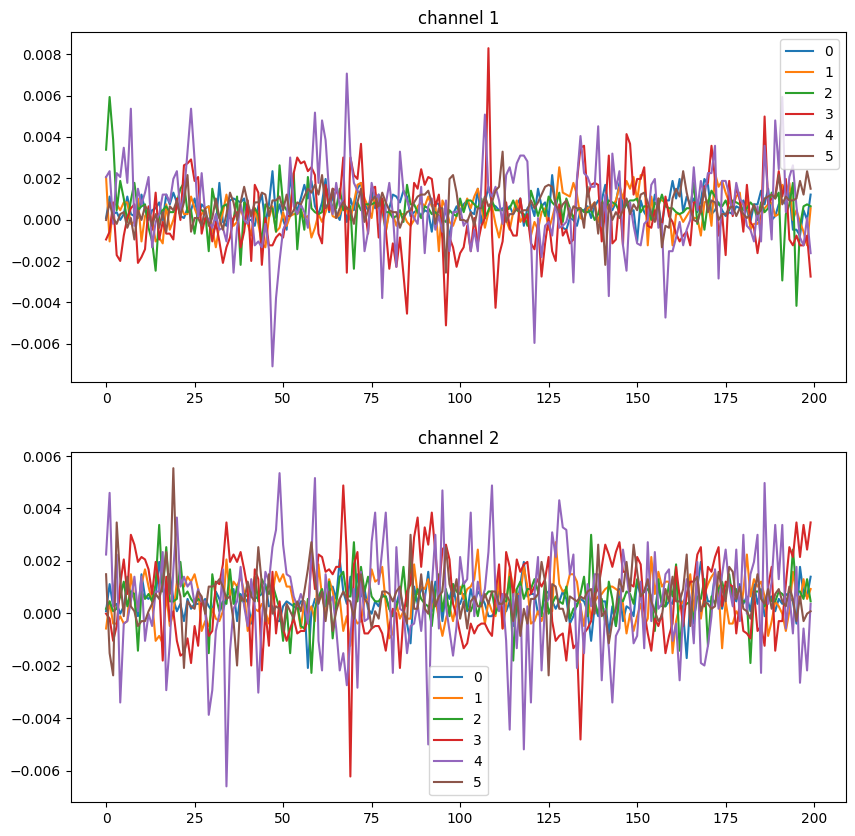

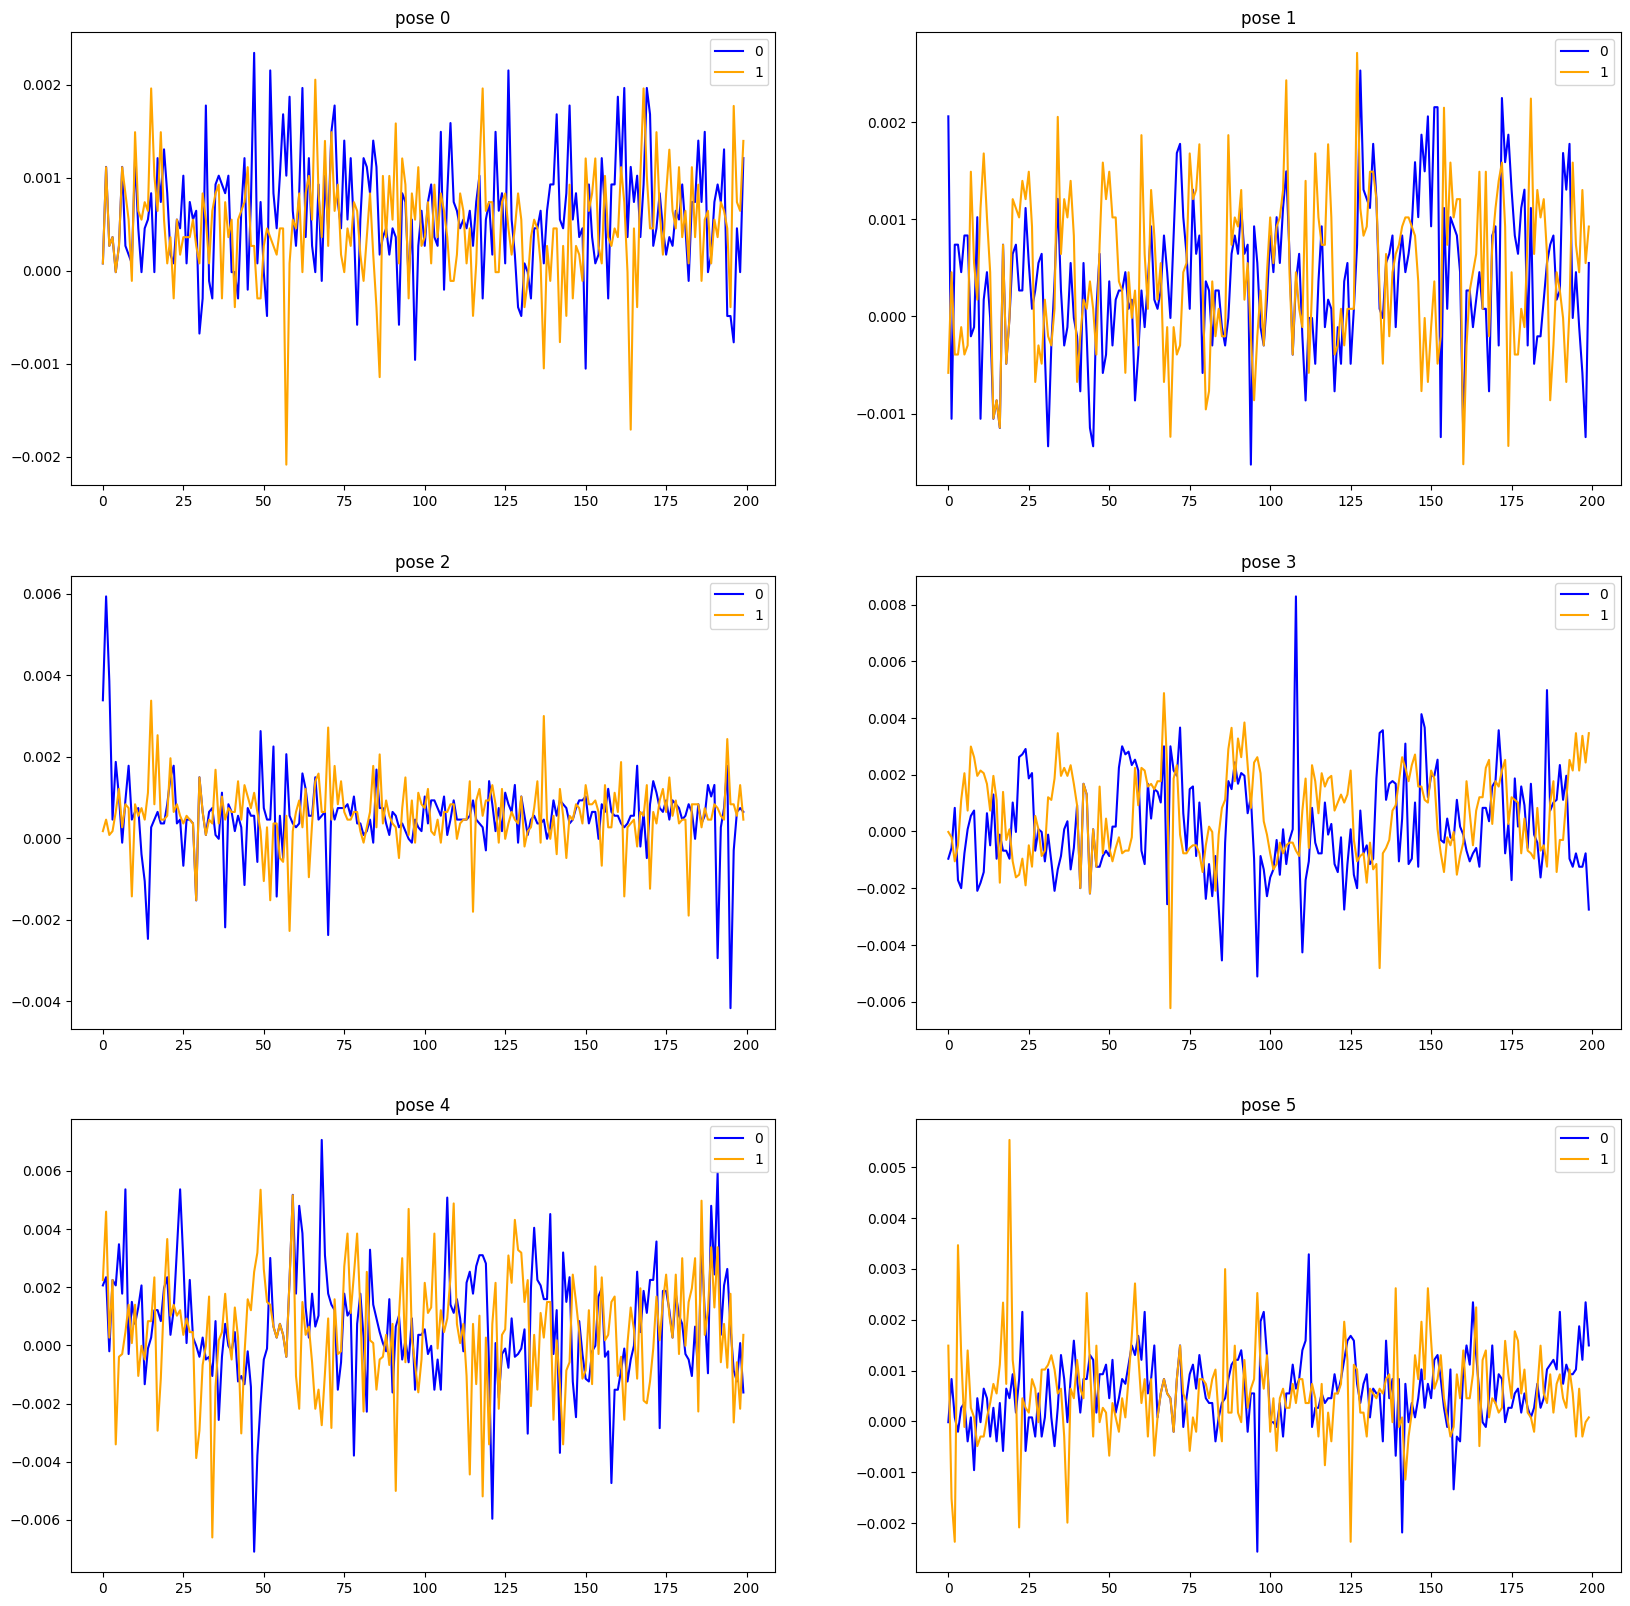

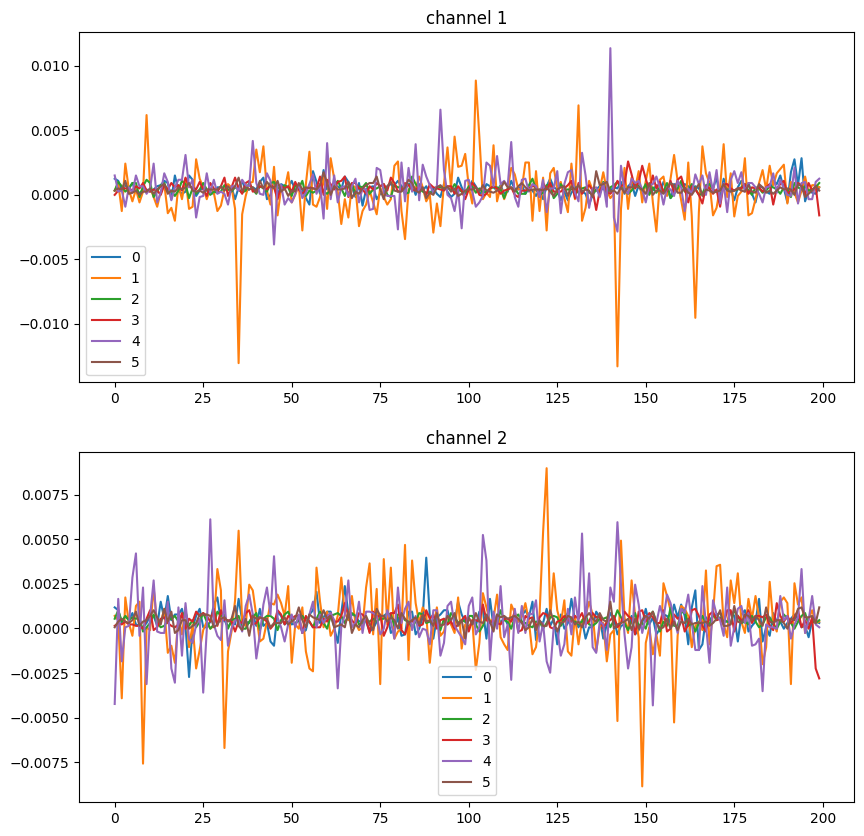

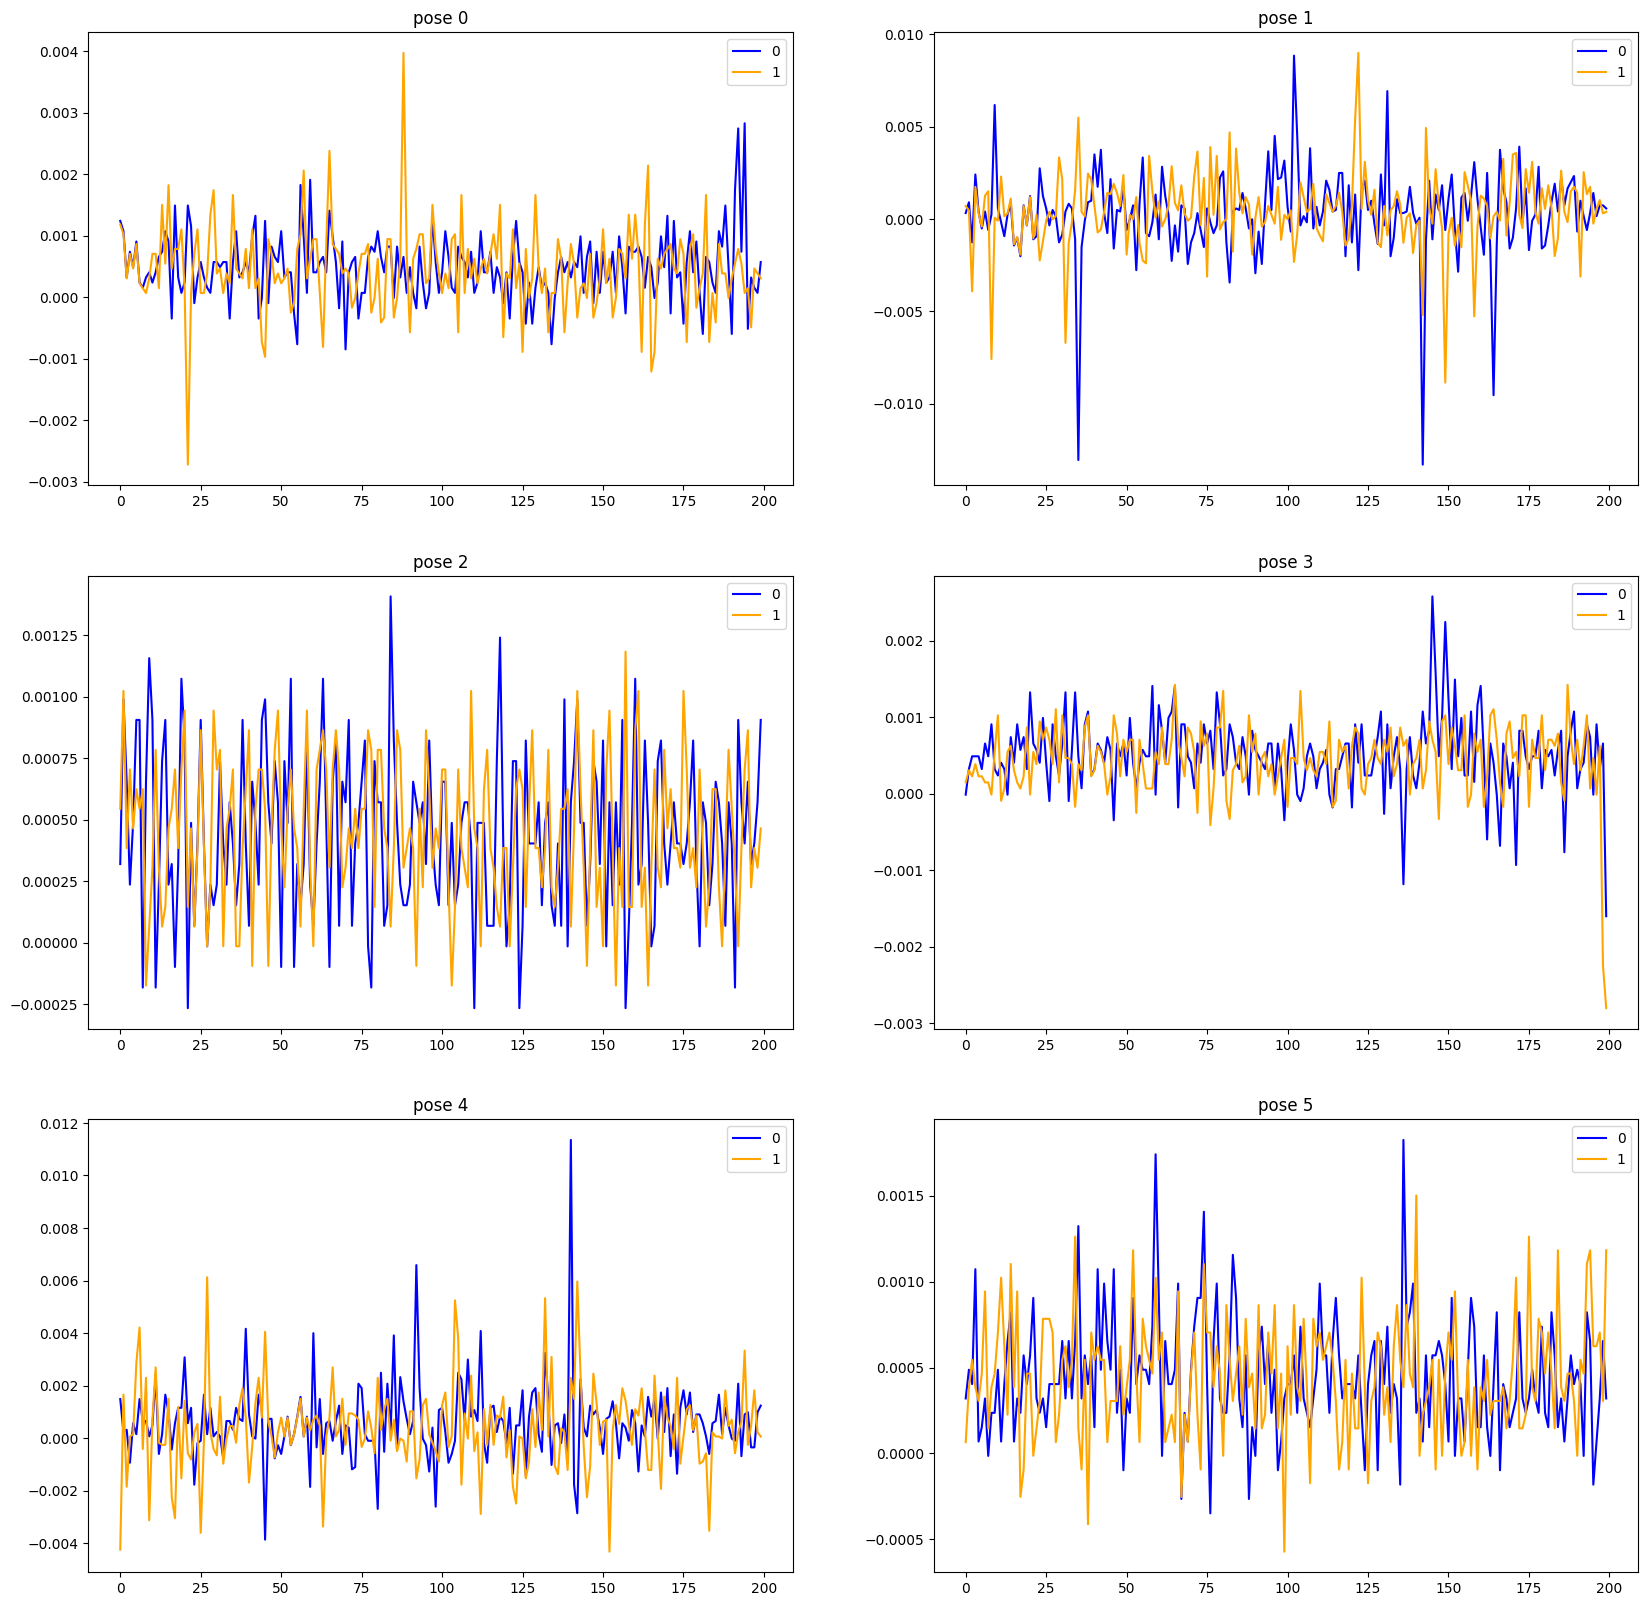

X shape: (337, 1600)


In [3]:
# SEPERATE SUBJECTS TO DIFFERENT DATASET

dataDir = "/media/james/Datasets_Drive1/semg_for_basic_hand_movment_6/Database_1/"
dataFiles=['female_1.mat','female_2.mat','female_3.mat','male_1.mat','male_2.mat']
dataFiles_train = ['female_1.mat','male_1.mat','male_2.mat']
dataFiles_test = ['female_2.mat','female_3.mat']
# dataFiles=['female_1.mat']

e = 2.718281828459045

def normalize_arr(arr,i):
    signal = arr.copy()
    signal = signal.tolist()
    signal.append(int(i/2))
    signal = np.array(signal)
    return signal

def get_channel_pair(chn1,chn2,i):
    paired_data = []
    label = int(i/2)
    chn1 =  list(np.delete(chn1,0,1))
    chn2 =  list(np.delete(chn2,0,1))

    for chunk1 in chn1:
        chunk2 = chn2[i].T
        chunk1 = chunk1.T

        while(len(chunk1)>0):
            row=[chunk1[0],chunk2[0],label]
            paired_data.append(row)

            chunk1 = list(chunk1)
            chunk2 = list(chunk2)
            chunk1.pop(0)
            chunk2.pop(0)

    return paired_data


def getData(dataFiles):
    data = [] #processed and normalised with pose_idx
    for file in dataFiles:
        data_path = dataDir+file
        print(data_path)
        mat = scipy.io.loadmat(data_path)
        mat.pop("__header__")
        mat.pop("__version__")
        mat.pop("__globals__")
        i=0

        plot_interval = 100
        plot_index = 0

        for channel in mat: 
        
            if(i%2==0):
                channel2 =  channel[:-1]
                channel2 += '2'
                sigs1 = mat[channel] 
                sigs2 = mat[channel2]
                sigs1_norm = []
                sigs2_norm = []

                for signal in sigs1:
                    # signal = normalize_arr(signal,i)
                    if(signal[0]<2):
                        sigs1_norm.append(signal)
                        sigs2_norm.append(signal)
                # for signal in sigs2:
                #     # signal = normalize_arr(signal,i)
                #     if(signal[0]<2):
                #         sigs2_norm.append(signal)

                if i==0:
                    data = get_channel_pair(sigs1_norm,sigs2_norm,i)
                else:
                    None
                    data_lc = get_channel_pair(sigs1_norm,sigs2_norm,i)
                    data += data_lc
            i+=1
    return data
def get_nm_data(dataFiles):
    data = getData(dataFiles)
    print(np.array(data).shape)
    print(data[-3])




    data_nm = np.copy(data)[:,:2]
    data_nm.shape
    nm_c1 =  preprocessing.normalize([data_nm.T[0]]).T.flatten()
    nm_c2 =  preprocessing.normalize([data_nm.T[1]]).T.flatten()
    df_data_nm = pd.DataFrame(np.vstack((nm_c1,nm_c2)).T, columns = ['channel1','channel2'])

    label_arr=[]

    for row in data:
        label_arr.append(int(row[2]))
    print(label_arr)

    data_nm = df_data_nm.assign(label=label_arr)
    return data_nm
data_train_nm = get_nm_data(dataFiles_train)
data_test_nm = get_nm_data(dataFiles_test)

#==========================================

def GetSpacedElements(array, numElems = 4):
    out = array[np.round(np.linspace(0, len(array)-1, numElems)).astype(int)]
    return out

sample = 200
rate = sample * 6
print(rate)

test_d = np.copy(data_train_nm)
test_c = np.copy(data_test_nm)

if True:
    test_d=  GetSpacedElements(test_d,rate)
    test_c=  GetSpacedElements(test_c,rate)
test_d = test_d.T
test_c = test_c.T

b = np.array((np.hsplit(test_d, 6)))
a = np.array((np.hsplit(test_c, 6)))


print(test_d.shape)
print(b.shape)
#////////////////////============
def display_signals(b):
    w = 20
    h = 20
    fig = plt.figure(figsize=(10, 10))
    columns = 1
    rows = 2

    for index in range(1,2+1):
        idx = 0
        fig.add_subplot(rows, columns, index)
        for signal in b:
            plt.plot(signal[index-1],label=str(idx))
            idx += 1
        plt.title('channel '+str(index))
        plt.legend(ncol=1)
        
            
    plt.show()
    fig = plt.figure(figsize=(20, 20))
    columns = 2
    rows = 3
    idx = 0

    for signal in b:
        fig.add_subplot(rows, columns, idx+1)
        plt.plot(signal[0],color='blue',label=str(0))
        plt.plot(signal[1],color='orange',label=str(1))
        idx += 1
        plt.title('pose '+str(idx-1))
        plt.legend(ncol=1)
            
    plt.show()
display_signals(b)
display_signals(a)

def reshape_data(n,df_data):
    # get n channel 1 and n channel 2 into 1 sample
    chn1 = df_data['channel1'].to_numpy()
    chn2 = df_data['channel2'].to_numpy()
    label = df_data['label'].to_numpy()
    i = 0
    newShape_data = []
    while i < chn1.size:
        #currently  the size is 540000, tack batch 20 signals, the loop will rn 27000 times
        reshape_data = np.concatenate((chn1[i:i+n], chn2[i:i+n]))
        tmp = reshape_data.tolist()
        tmp.append(int(label[i]))
        tmp = np.array(tmp)

        if(len(reshape_data)==n*2):
            newShape_data.append(tmp)
        i += n

    newShape_data = np.array(newShape_data)
    return newShape_data

def split_X(arr):
    arr = arr.T
    arr = arr[0:-1]
    arr = arr.T
    return arr
def split_y(arr):
    arr = arr.T
    arr = arr[-1]
    arr = arr.T.astype(np.uint8)
    return arr
def reshape_arr(arr):
    new_shape = []
    for row in arr:
        n_len =int(math.sqrt(len(row)))
        row = row.reshape(n_len,n_len)
        new_shape.append(row)
    return np.array(new_shape)
def reshape_arr_img_transfer(arr,n):
    new_shape = []
    for row in arr:
        n_len = len(row)
        # row =np.pad(row,(0,n-n_len),'symmetric')
        row =np.pad(row,(0,n-n_len),'constant',constant_values=10)
        row = row.reshape(n,n)
        new_shape.append(row)
    return np.array(new_shape)
def signal_to_3channelimg(arr):
    print(arr[0].shape)
    rgb_batch_ts =  np.repeat(arr[..., np.newaxis], 3, -1)
    rgb_batch_ts.shape
    return rgb_batch_ts
# print(df)
def reshape_for_conv2d(t,w,h):
    train_size = int(len(t) * len(t[0])* len(t[0][0]) / (w*h))
    reshaped_tuple = t.reshape(train_size, w,h, 1)
    return reshaped_tuple




dataset_train = data_train_nm
dataset_test = data_test_nm

val_test_mask = np.random.rand(len(data_train_nm)) < 0.5

dataset_train = data_train_nm[val_test_mask]
dataset_val = data_train_nm[~val_test_mask]

img_w_h_len = 40
n = int(img_w_h_len * img_w_h_len / 2)

dataset_train_ar = reshape_data(n,dataset_train)
dataset_test_ar = reshape_data(n,dataset_test)
dataset_val_ar = reshape_data(n,dataset_val)

# print(dataset_train_ar[-20:][-1])

np.random.shuffle(dataset_train_ar)
np.random.shuffle(dataset_test_ar)
np.random.shuffle(dataset_val_ar)

# print(dataset_train_ar[-20:][-1])

X = split_X(dataset_train_ar)
y = split_y(dataset_train_ar)
print("X shape:",X.shape)

X_val = split_X(dataset_val_ar)
y_val = split_y(dataset_val_ar)

X_test = split_X(dataset_test_ar)
y_test = split_y(dataset_test_ar)


# OPTIONAL TURN X TO NxN
X = reshape_arr(X)
X_test = reshape_arr(X_test)
X_val = reshape_arr(X_val)



w = img_w_h_len
h = img_w_h_len
X = reshape_for_conv2d(X,w,h)
X_test = reshape_for_conv2d(X_test,w,h)
X_val = reshape_for_conv2d(X_val,w,h)
X_test = reshape_for_conv2d(X_test,w,h)




## Get Data as if it's true data


In [45]:
# SEPERATE SUBJECTS TO DIFFERENT DATASET - NO SHUFFLE

dataDir = "/media/james/Datasets_Drive1/semg_for_basic_hand_movment_6/Database_1/"
dataFiles=['female_1.mat','female_2.mat','female_3.mat','male_1.mat','male_2.mat']
dataFiles_train = ['female_1.mat','male_1.mat','male_2.mat']
dataFiles_test = ['female_2.mat','female_3.mat']
# dataFiles=['female_1.mat']

e = 2.718281828459045





dataset_train = data_train_nm
dataset_test = data_test_nm

val_test_mask = np.random.rand(len(data_train_nm)) < 0.5

dataset_train = data_train_nm[val_test_mask]
dataset_val = data_train_nm[~val_test_mask]

img_w_h_len = 40
n = int(img_w_h_len * img_w_h_len / 2)

dataset_train_ar = reshape_data(n,dataset_train)
dataset_test_ar = reshape_data(n,dataset_test)
dataset_val_ar = reshape_data(n,dataset_val)



# print(dataset_train_ar[-20:][-1])

X = split_X(dataset_train_ar)
y = split_y(dataset_train_ar)
print("X shape:",X.shape)

X_val = split_X(dataset_val_ar)
y_val = split_y(dataset_val_ar)

X_test = split_X(dataset_test_ar)
y_test = split_y(dataset_test_ar)


# OPTIONAL TURN X TO NxN
X = reshape_arr(X)
X_test = reshape_arr(X_test)
X_val = reshape_arr(X_val)



w = img_w_h_len
h = img_w_h_len
X = reshape_for_conv2d(X,w,h)
X_test = reshape_for_conv2d(X_test,w,h)
X_val = reshape_for_conv2d(X_val,w,h)
X_test = reshape_for_conv2d(X_test,w,h)




X shape: (337, 1600)


In [ ]:
# ALT WAY TO GET TEST AND TRAIN DATA: MERGE & NO SHUFFLE


dataDir = "/media/james/Datasets_Drive1/semg_for_basic_hand_movment_6/Database_1/"
dataFiles=['female_1.mat','female_2.mat','female_3.mat','male_1.mat','male_2.mat']
dataFiles=['female_1.mat','male_1.mat','male_2.mat']
dataFiles=['female_2.mat','female_3.mat']
# dataFiles=['female_1.mat']

data = [] #processed and normalised with pose_idx
e = 2.718281828459045

def normalize_arr(arr,i):
    signal = arr.copy()
    # signal = e**signal
    # signal /= np.sum(signal)
    # signal = np.clip(signal,1e-7,1e+7)
    signal = signal.tolist()
    signal.append(int(i/2))
    signal = np.array(signal)
    return signal

def get_channel_pair(chn1,chn2,i):
    paired_data = []
    # label = list((np.array(chn1).T)[-1].T.astype(int))
    label = int(i/2)
    chn1 =  list(np.delete(chn1,0,1))
    chn2 =  list(np.delete(chn2,0,1))
    # print(np.array(chn1).shape)
    # print(label)
    # print('label[i]: ',label[i])
    for chunk1 in chn1:
        chunk2 = chn2[i].T
        chunk1 = chunk1.T

        while(len(chunk1)>0):
            row=[chunk1[0],chunk2[0],label]
            paired_data.append(row)

            chunk1 = list(chunk1)
            chunk2 = list(chunk2)
            chunk1.pop(0)
            chunk2.pop(0)

    return paired_data



for file in dataFiles:
    data_path = dataDir+file
    print(data_path)
    mat = scipy.io.loadmat(data_path)
    mat.pop("__header__")
    mat.pop("__version__")
    mat.pop("__globals__")
    i=0

    plot_interval = 100
    plot_index = 0

    for channel in mat: 
       
        if(i%2==0):
            channel2 =  channel[:-1]
            channel2 += '2'
            sigs1 = mat[channel] 
            sigs2 = mat[channel2]
            sigs1_norm = []
            sigs2_norm = []

            for signal in sigs1:
                # signal = normalize_arr(signal,i)
                if(signal[0]<2):
                    sigs1_norm.append(signal)
            for signal in sigs2:
                # signal = normalize_arr(signal,i)
                if(signal[0]<2):
                    sigs2_norm.append(signal)
            if i==0:
                data = get_channel_pair(sigs1_norm,sigs2_norm,i)
            else:
                None
                data_lc = get_channel_pair(sigs1_norm,sigs2_norm,i)
                data += data_lc
        i+=1

print(np.array(data).shape)
print(data[-3])



from sklearn import preprocessing

data_nm = np.copy(data)[:,:2]
data_nm.shape
nm_c1 =  preprocessing.normalize([data_nm.T[0]]).T.flatten()
nm_c2 =  preprocessing.normalize([data_nm.T[1]]).T.flatten()
# nm_c2 = data_nm.T[1].T
df_data_nm = pd.DataFrame(np.vstack((nm_c1,nm_c2)).T, columns = ['channel1','channel2'])

label_arr=[]

for row in data:
    label_arr.append(int(row[2]))
print(label_arr)

data_nm = df_data_nm.assign(label=label_arr)
data_nm

#==========================================

def GetSpacedElements(array, numElems = 4):
    out = array[np.round(np.linspace(0, len(array)-1, numElems)).astype(int)]
    return out

sample = 200
rate = sample * 6
print(rate)

# test_d = np.copy(data)
test_d = np.copy(data_nm)

if True:
    test_d=  GetSpacedElements(test_d,rate)
test_d = test_d.T

# test_d = list(test_d)
b = np.array((np.hsplit(test_d, 6)))
# b = test_d


print(test_d.shape)
print(b.shape)
#////////////////////============

w = 20
h = 20
fig = plt.figure(figsize=(10, 10))
columns = 1
rows = 2

for index in range(1,2+1):
    idx = 0
    fig.add_subplot(rows, columns, index)
    for signal in b:
        plt.plot(signal[index-1],label=str(idx))
        idx += 1
    plt.title('channel '+str(index))
    plt.legend(ncol=1)
    
        
plt.show()
w = 20
h = 20
fig = plt.figure(figsize=(20, 20))
columns = 2
rows = 3
idx = 0

for signal in b:
    fig.add_subplot(rows, columns, idx+1)
    plt.plot(signal[0],color='blue',label=str(0))
    plt.plot(signal[1],color='orange',label=str(1))
    # plt.plot(signal[0],'r-d',label=str(0))
    # plt.plot(signal[1],'k-o',label=str(1))
    idx += 1
    plt.title('pose '+str(idx-1))
    plt.legend(ncol=1)
        
plt.show()
import pandas as pd
import math  
def reshape_data(n,df_data):
    # get n channel 1 and n channel 2 into 1 sample
    chn1 = df_data['channel1'].to_numpy()
    chn2 = df_data['channel2'].to_numpy()
    label = df_data['label'].to_numpy()
    i = 0
    newShape_data = []
    while i < chn1.size:
        #currently  the size is 540000, tack batch 20 signals, the loop will rn 27000 times
        reshape_data = np.concatenate((chn1[i:i+n], chn2[i:i+n]))
        tmp = reshape_data.tolist()
        tmp.append(int(label[i]))
        tmp = np.array(tmp)

        if(len(reshape_data)==n*2):
            newShape_data.append(tmp)
        i += n

    newShape_data = np.array(newShape_data)
    return newShape_data

def split_X(arr):
    arr = arr.T
    arr = arr[0:-1]
    arr = arr.T
    return arr
def split_y(arr):
    arr = arr.T
    arr = arr[-1]
    arr = arr.T.astype(np.uint8)
    return arr
def reshape_arr(arr):
    new_shape = []
    for row in arr:
        n_len =int(math.sqrt(len(row)))
        row = row.reshape(n_len,n_len)
        new_shape.append(row)
    return np.array(new_shape)
def reshape_arr_img_transfer(arr,n):
    new_shape = []
    for row in arr:
        n_len = len(row)
        # row =np.pad(row,(0,n-n_len),'symmetric')
        row =np.pad(row,(0,n-n_len),'constant',constant_values=10)
        row = row.reshape(n,n)
        new_shape.append(row)
    return np.array(new_shape)
def signal_to_3channelimg(arr):
    print(arr[0].shape)
    rgb_batch_ts =  np.repeat(arr[..., np.newaxis], 3, -1)
    rgb_batch_ts.shape
    return rgb_batch_ts
# print(df)
def reshape_for_conv2d(t,w,h):
    train_size = int(len(t) * len(t[0])* len(t[0][0]) / (w*h))
    reshaped_tuple = t.reshape(train_size, w,h, 1)
    return reshaped_tuple

df = data_nm
# df = pd.DataFrame(data.copy(),columns = ['channel1','channel2','label'])


mask = np.random.rand(len(df)) < 0.8
dataset_t_v = df[mask] #test & val
dataset_test = df[~mask]

val_test_mask = np.random.rand(len(dataset_t_v)) < 0.5
dataset_train = dataset_t_v[val_test_mask]
dataset_val = dataset_t_v[~val_test_mask]
img_w_h_len = 40
n = int(img_w_h_len * img_w_h_len / 2)

dataset_train_ar = reshape_data(n,dataset_train)
dataset_test_ar = reshape_data(n,dataset_test)
dataset_val_ar = reshape_data(n,dataset_val)
# print(dataset_train_ar[-20:][-1])


# print(dataset_train_ar[-20:][-1])

X = split_X(dataset_train_ar)
y = split_y(dataset_train_ar)
print("X shape:",X.shape)

X_val = split_X(dataset_train_ar)
y_val = split_y(dataset_train_ar)

X_test = split_X(dataset_test_ar)
y_test = split_y(dataset_test_ar)


# OPTIONAL TURN X TO NxN
X = reshape_arr(X)
X_val = reshape_arr(X_val)
X_test = reshape_arr(X_test)

# OPTIONAL TURN X TO NxN | N>= 150 transfer learning
tuple_size = 150
X_tl = reshape_arr_img_transfer(X,tuple_size)
# X_val_tl = reshape_arr_img_transfer(X_val,tuple_size)
# X_test_tl = reshape_arr_img_transfer(X_test,tuple_size)
w = img_w_h_len
h = img_w_h_len
X_test = reshape_for_conv2d(X_test,w,h)
X = reshape_for_conv2d(X,w,h)

# X_tl = signal_to_3channelimg(X_tl)
# X = signal_to_3channelimg(X)
# X_test = signal_to_3channelimg(X_test)


In [ ]:
# ALT WAY TO GET TEST AND TRAIN DATA: MERGE & SHUFFLE


dataDir = "/media/james/Datasets_Drive1/semg_for_basic_hand_movment_6/Database_1/"
dataFiles=['female_1.mat','female_2.mat','female_3.mat','male_1.mat','male_2.mat']
dataFiles=['female_1.mat','male_1.mat','male_2.mat']
dataFiles=['female_2.mat','female_3.mat']
# dataFiles=['female_1.mat']

data = [] #processed and normalised with pose_idx
e = 2.718281828459045

def normalize_arr(arr,i):
    signal = arr.copy()
    # signal = e**signal
    # signal /= np.sum(signal)
    # signal = np.clip(signal,1e-7,1e+7)
    signal = signal.tolist()
    signal.append(int(i/2))
    signal = np.array(signal)
    return signal

def get_channel_pair(chn1,chn2,i):
    paired_data = []
    # label = list((np.array(chn1).T)[-1].T.astype(int))
    label = int(i/2)
    chn1 =  list(np.delete(chn1,0,1))
    chn2 =  list(np.delete(chn2,0,1))
    # print(np.array(chn1).shape)
    # print(label)
    # print('label[i]: ',label[i])
    for chunk1 in chn1:
        chunk2 = chn2[i].T
        chunk1 = chunk1.T

        while(len(chunk1)>0):
            row=[chunk1[0],chunk2[0],label]
            paired_data.append(row)

            chunk1 = list(chunk1)
            chunk2 = list(chunk2)
            chunk1.pop(0)
            chunk2.pop(0)

    return paired_data



for file in dataFiles:
    data_path = dataDir+file
    print(data_path)
    mat = scipy.io.loadmat(data_path)
    mat.pop("__header__")
    mat.pop("__version__")
    mat.pop("__globals__")
    i=0

    plot_interval = 100
    plot_index = 0

    for channel in mat: 
       
        if(i%2==0):
            channel2 =  channel[:-1]
            channel2 += '2'
            sigs1 = mat[channel] 
            sigs2 = mat[channel2]
            sigs1_norm = []
            sigs2_norm = []

            for signal in sigs1:
                # signal = normalize_arr(signal,i)
                if(signal[0]<2):
                    sigs1_norm.append(signal)
            for signal in sigs2:
                # signal = normalize_arr(signal,i)
                if(signal[0]<2):
                    sigs2_norm.append(signal)
            if i==0:
                data = get_channel_pair(sigs1_norm,sigs2_norm,i)
            else:
                None
                data_lc = get_channel_pair(sigs1_norm,sigs2_norm,i)
                data += data_lc
        i+=1

print(np.array(data).shape)
print(data[-3])



from sklearn import preprocessing

data_nm = np.copy(data)[:,:2]
data_nm.shape
nm_c1 =  preprocessing.normalize([data_nm.T[0]]).T.flatten()
nm_c2 =  preprocessing.normalize([data_nm.T[1]]).T.flatten()
# nm_c2 = data_nm.T[1].T
df_data_nm = pd.DataFrame(np.vstack((nm_c1,nm_c2)).T, columns = ['channel1','channel2'])

label_arr=[]

for row in data:
    label_arr.append(int(row[2]))
print(label_arr)

data_nm = df_data_nm.assign(label=label_arr)
data_nm

#==========================================

def GetSpacedElements(array, numElems = 4):
    out = array[np.round(np.linspace(0, len(array)-1, numElems)).astype(int)]
    return out

sample = 200
rate = sample * 6
print(rate)

# test_d = np.copy(data)
test_d = np.copy(data_nm)

if True:
    test_d=  GetSpacedElements(test_d,rate)
test_d = test_d.T

# test_d = list(test_d)
b = np.array((np.hsplit(test_d, 6)))
# b = test_d


print(test_d.shape)
print(b.shape)
#////////////////////============

w = 20
h = 20
fig = plt.figure(figsize=(10, 10))
columns = 1
rows = 2

for index in range(1,2+1):
    idx = 0
    fig.add_subplot(rows, columns, index)
    for signal in b:
        plt.plot(signal[index-1],label=str(idx))
        idx += 1
    plt.title('channel '+str(index))
    plt.legend(ncol=1)
    
        
plt.show()
w = 20
h = 20
fig = plt.figure(figsize=(20, 20))
columns = 2
rows = 3
idx = 0

for signal in b:
    fig.add_subplot(rows, columns, idx+1)
    plt.plot(signal[0],color='blue',label=str(0))
    plt.plot(signal[1],color='orange',label=str(1))
    # plt.plot(signal[0],'r-d',label=str(0))
    # plt.plot(signal[1],'k-o',label=str(1))
    idx += 1
    plt.title('pose '+str(idx-1))
    plt.legend(ncol=1)
        
plt.show()
import pandas as pd
import math  
def reshape_data(n,df_data):
    # get n channel 1 and n channel 2 into 1 sample
    chn1 = df_data['channel1'].to_numpy()
    chn2 = df_data['channel2'].to_numpy()
    label = df_data['label'].to_numpy()
    i = 0
    newShape_data = []
    while i < chn1.size:
        #currently  the size is 540000, tack batch 20 signals, the loop will rn 27000 times
        reshape_data = np.concatenate((chn1[i:i+n], chn2[i:i+n]))
        tmp = reshape_data.tolist()
        tmp.append(int(label[i]))
        tmp = np.array(tmp)

        if(len(reshape_data)==n*2):
            newShape_data.append(tmp)
        i += n

    newShape_data = np.array(newShape_data)
    return newShape_data

def split_X(arr):
    arr = arr.T
    arr = arr[0:-1]
    arr = arr.T
    return arr
def split_y(arr):
    arr = arr.T
    arr = arr[-1]
    arr = arr.T.astype(np.uint8)
    return arr
def reshape_arr(arr):
    new_shape = []
    for row in arr:
        n_len =int(math.sqrt(len(row)))
        row = row.reshape(n_len,n_len)
        new_shape.append(row)
    return np.array(new_shape)
def reshape_arr_img_transfer(arr,n):
    new_shape = []
    for row in arr:
        n_len = len(row)
        # row =np.pad(row,(0,n-n_len),'symmetric')
        row =np.pad(row,(0,n-n_len),'constant',constant_values=10)
        row = row.reshape(n,n)
        new_shape.append(row)
    return np.array(new_shape)
def signal_to_3channelimg(arr):
    print(arr[0].shape)
    rgb_batch_ts =  np.repeat(arr[..., np.newaxis], 3, -1)
    rgb_batch_ts.shape
    return rgb_batch_ts
# print(df)
def reshape_for_conv2d(t,w,h):
    train_size = int(len(t) * len(t[0])* len(t[0][0]) / (w*h))
    reshaped_tuple = t.reshape(train_size, w,h, 1)
    return reshaped_tuple

df = data_nm
# df = pd.DataFrame(data.copy(),columns = ['channel1','channel2','label'])


mask = np.random.rand(len(df)) < 0.8
dataset_t_v = df[mask] #test & val
dataset_test = df[~mask]

val_test_mask = np.random.rand(len(dataset_t_v)) < 0.5
dataset_train = dataset_t_v[val_test_mask]
dataset_val = dataset_t_v[~val_test_mask]
img_w_h_len = 40
n = int(img_w_h_len * img_w_h_len / 2)

# n=392
# n=800
# n=961
# n=2888
dataset_train_ar = reshape_data(n,dataset_train)
dataset_test_ar = reshape_data(n,dataset_test)
dataset_val_ar = reshape_data(n,dataset_val)
# print(dataset_train_ar[-20:][-1])

np.random.shuffle(dataset_train_ar)
np.random.shuffle(dataset_test_ar)
np.random.shuffle(dataset_val_ar)

# print(dataset_train_ar[-20:][-1])

X = split_X(dataset_train_ar)
y = split_y(dataset_train_ar)
print("X shape:",X.shape)

X_val = split_X(dataset_train_ar)
y_val = split_y(dataset_train_ar)

X_test = split_X(dataset_test_ar)
y_test = split_y(dataset_test_ar)


# OPTIONAL TURN X TO NxN
X = reshape_arr(X)
X_val = reshape_arr(X_val)
X_test = reshape_arr(X_test)

# OPTIONAL TURN X TO NxN | N>= 150 transfer learning
tuple_size = 150
X_tl = reshape_arr_img_transfer(X,tuple_size)
# X_val_tl = reshape_arr_img_transfer(X_val,tuple_size)
# X_test_tl = reshape_arr_img_transfer(X_test,tuple_size)
w = img_w_h_len
h = img_w_h_len
X_test = reshape_for_conv2d(X_test,w,h)
X = reshape_for_conv2d(X,w,h)

# X_tl = signal_to_3channelimg(X_tl)
# X = signal_to_3channelimg(X)
# X_test = signal_to_3channelimg(X_test)


# Display the signal image

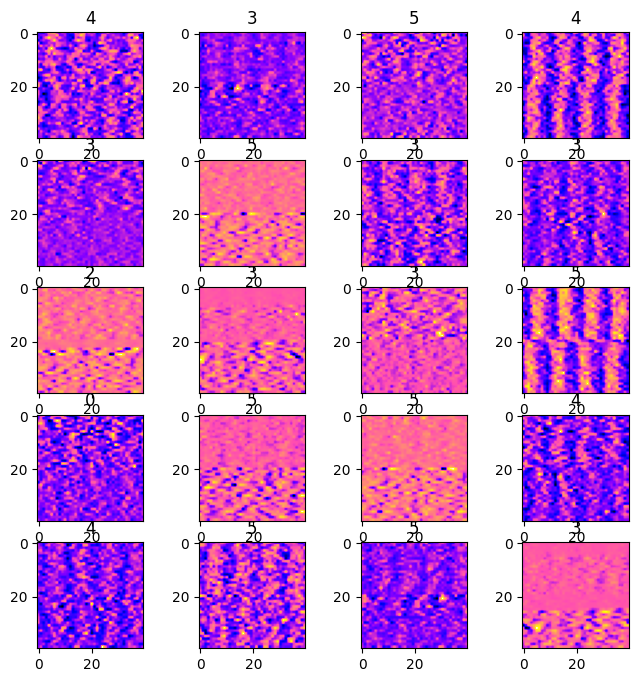

[4 3 5 4 3 5 3 3 2 3 3 5 0 5 5 4 4 5 5 3]


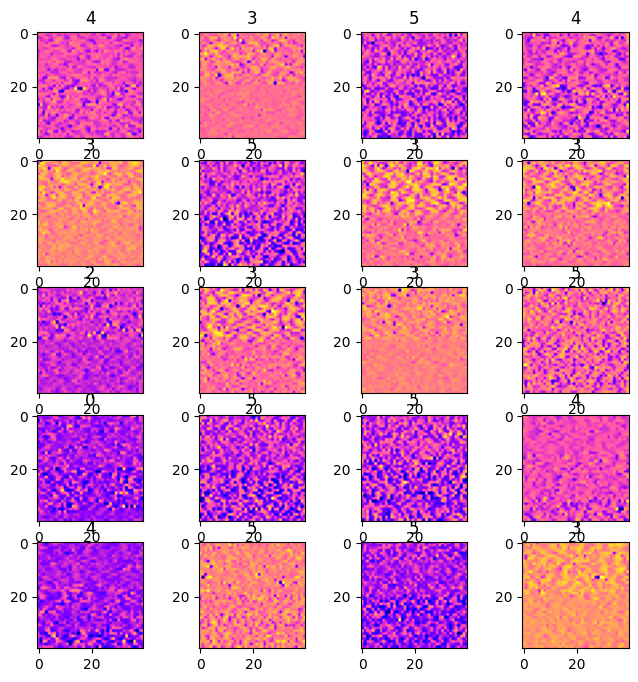

[5 5 1 2 1 0 5 3 0 4 1 2 1 0 0 3 3 5 5 3]


In [ ]:
w = 20
h = 20
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5

for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.title(y[i-1])
    plt.imshow(X_test[i-1],cmap='gnuplot2')
    # plt.imshow(X[i-1]*255)
plt.show()
print(y[:(columns*rows)])

fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5

for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.title(y[i-1])
    # plt.imshow(X[i-1]*255,cmap='gnuplot2')
    plt.imshow(X[i-1],cmap='gnuplot2')
    # plt.imshow(X[i-1]*255)

plt.show()
print(y_test[:(columns*rows)])



w = img_w_h_len
h = img_w_h_len

# NN
## training & evaluate

In [36]:
# MODEL - CONV2D + DENSE
w = 40
h = 40
input_shape = [w, h, 1]

inputs = keras.Input(shape=input_shape)
x = layers.Rescaling(scale=2)(inputs)

x = layers.Conv2D(64, (3,3), activation='relu',use_bias=True, input_shape=input_shape[1:])(x)
x = layers.MaxPooling2D(pool_size=(7, 7), strides=(1, 1), padding='valid')(x)

x = keras.layers.Dropout(0.5)(x,training=True)   # Regularize with dropout

x = layers.Conv2D(32, (5,5), activation='relu',use_bias=True, input_shape=input_shape[1:])(x)
x = layers.MaxPooling2D(pool_size=(5,5), strides=(3, 2), padding='valid')(x)

x = layers.Softmax()(x)

x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(18, activation="relu")(x)

x = keras.layers.GlobalAveragePooling2D()(x)

num_classes = 6

outputs = keras.layers.Dense(num_classes,activation="softmax")(x) 

model = keras.Model(inputs, outputs)
# model = new_model
# model.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.1), 
model.compile(optimizer=keras.optimizers.Nadam(learning_rate=1e-3), 
        loss="sparse_categorical_crossentropy",
    metrics=['accuracy'])
model.summary()



Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 40, 40, 1)]       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 40, 40, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        51232     
                                                           

In [ ]:
plot_model(model, to_file="/tmp/model.png", show_shapes=True)


## TENSOR BOARD

In [ ]:
%tensorboard --logdir logs/fit

UsageError: Line magic function `%tensorboard` not found.


In [37]:
# T R A I N

batch_size = 100
# epochs = 200

epochs = 6500

log_dir = "./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
my_callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1),
    tf.keras.callbacks.EarlyStopping(patience=100,monitor='loss'),
    tf.keras.callbacks.ModelCheckpoint(
        filepath='./models/checkpoints/model.{epoch:02d}-{loss:.2f}.h5',
        monitor='loss',
        mode='max',
        save_freq=200,
        save_best_only=True
        ),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=10)
]
history = model.fit(X, y,batch_size=batch_size, epochs=epochs,callbacks=my_callbacks)

print(history.params)
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

evaluate = model.evaluate(X_test,y_test)


Epoch 1/6500


2023-11-25 09:09:51.776521: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_2/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-11-25 09:10:02.105361: W tensorflow/tsl/framework/bfc_allocator.cc:485] Allocator (GPU_0_bfc) ran out of memory trying to allocate 35.25MiB (rounded to 36966400)requested by op model_2/conv2d_2/Relu
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-11-25 09:10:02.105446: I tensorflow/tsl/framework/bfc_allocator.cc:1039] BFCAllocator dump for GPU_0_bfc
2023-11-25 09:10:02.105481: I tensorflow/tsl/framework/bfc_allocator.cc:1046] Bin (256): 	Total Chunks: 144, Chunks in use: 142. 36.0KiB allocated for chunks. 35.5KiB in use in bin. 7.6KiB client-requested in use in

ResourceExhaustedError: Graph execution error:

Detected at node model_2/conv2d_2/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/traitlets/config/application.py", line 1053, in launch_instance

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 737, in start

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 524, in dispatch_queue

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 513, in process_one

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 418, in dispatch_shell

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 758, in execute_request

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 426, in do_execute

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3046, in run_cell

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3101, in _run_cell

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3306, in run_cell_async

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3488, in run_ast_nodes

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3548, in run_code

  File "/tmp/ipykernel_260086/696172652.py", line 22, in <module>

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/training.py", line 1783, in fit

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/training.py", line 1377, in train_function

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/training.py", line 1360, in step_function

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/training.py", line 1349, in run_step

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/training.py", line 1126, in train_step

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/training.py", line 589, in __call__

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/activations.py", line 306, in relu

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/backend.py", line 5397, in relu

OOM when allocating tensor with shape[100,64,38,38] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model_2/conv2d_2/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_133688]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 3 3 3 3]
11/11 [==============================] - 0s 7ms/step
X,y shape:  (338, 40, 40, 1) / (338,) 
X,y test shape:  (671, 40, 40, 1) / (671,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (4,).

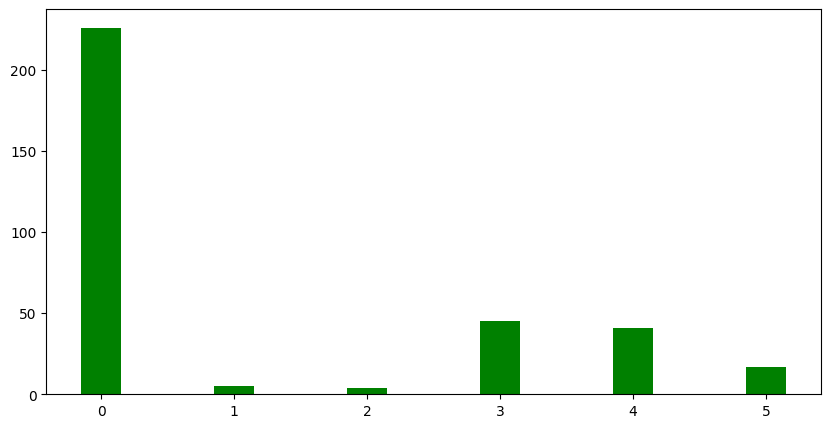

In [311]:
# DISPLAY PREDICTION
test_sample = len(y)


print(y_test[:test_sample])
pred_label = []

preds = model.predict(X_test[:test_sample])

for prediction in preds:
    pred_label.append(np.argmax(prediction))
pred_label = np.array(pred_label)
print('X,y shape: ',X.shape,'/',y.shape,"\nX,y test shape: ",X_test.shape,"/", y_test.shape)
print(pred_label[:test_sample],"\n\n")

evaluate = model.evaluate(X_test[:test_sample],y_test[:test_sample])


unique, counts = np.unique(pred_label, return_counts=True)
unique, ycounts = np.unique(y_test[:test_sample], return_counts=True)


fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(np.arange(6), counts, color ='green', 
        width = 0.3)
plt.bar(np.arange(6), ycounts, color ='blue', 
        width = 0.2,alpha=0.5)
 
plt.xlabel("classes-poses")
plt.ylabel("occurrence")
plt.title("prediction of tuned model")
plt.show()
plt.plot(y_test[:test_sample],color ='green', label="true value")
plt.plot(pred_label,color ='red', linewidth=4, alpha=0.5,label="prediction")
 
plt.xlabel("classes-poses")
plt.ylabel("occurrence")
plt.title("prediction of tuned model")
plt.legend(ncol=1)

plt.show()

## Save a model

In [310]:
# model.save("./models/tuned_model_loss_5.0_0.1_acc_us_15_11.keras")

## load a model

2023-11-25 07:24:57.137692: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-25 07:24:57.138202: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-25 07:24:57.138690: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

21/21 [==============================] - 3s 12ms/step


 [0 3 2 3 3 2 0 3 3 2 4 3 3 3 4 2 0 0 3 0 5 1 4 2 3 0 5 0 3 0 0 0 2 5 0 0 5
 0 3 3 5 1 4 1 2 1 5 4 5 1 2 5 4 2 1 1 0 3 5 0 2 5 5 0 0 2 5 2 4 1 1 2 1 4
 0 5 5 3 3 4 3 3 1 5 0 4 4 1 4 2 0 3 4 0 4 2 0 5 1 0 5 3 5 5 0 3 1 0 4 5 4
 5 1 3 4 5 5 1 5 5 2 1 3 3 4 5 5 0 5 2 0 3 1 1 2 5 3 2 3 1 1 3 0 4 4 1 3 2
 4 0 3 2 5 0 5 4 2 2 0 1 4 0 1 1 1 5 1 3 5 2 0 4 5 1 5 3 1 0 3 4 2 1 4 5 4
 3 0 0 2 4 1 2 0 2 5 4 5 2 1 4 3 3 4 3 1 2 3 5 1 4 0 3 2 3 1 3 2 2 2 5 5 4
 0 0 0 0 0 5 2 5 1 0 0 0 0 3 1 2 2 1 1 2 1 2 5 4 1 5 4 0 4 1 5 5 1 0 3 4 1
 2 2 0 2 5 2 5 1 5 2 3 2 1 5 3 5 4 0 5 4 3 4 4 3 1 3 1 4 5 0 0 3 2 5 1 3 5
 3 1 3 3 1 0 5 0 3 2 3 1 0 3 4 5 4 0 5 5 5 0 4 5 2 4 2 3 4 1 0 3 1 0 2 4 2
 1 5 1 4 2 0 0 4 5 4 4 5 4 0 2 0 3 2 2 0 0 5 3 3 4 4 1 3 1 2 5 5 3 1 2 0 5
 3 5 2 2 1 3 2 1 2 5 3 1 5 4 2 2 0 3 1 4 1 4 4 4 3 1 2 3 0 2 2 2 4 2 5 0 0
 2 0 2 4 2 1 5 4 0 2 1 0 3 2 4 2 2 5 3 4 0 4 4 4 3 1 0 4 5 2 0 2 3 3 4 2 1
 0 3 1 5 0 1 2 5 3 4 0 1 4 4 2 5 5 4 0 1 5 

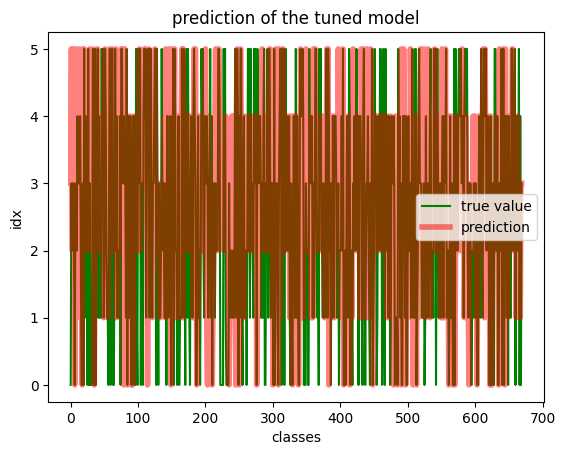

In [4]:
# load_model_1 = keras.models.load_model('./models/tuned_model_loss_2_0.4_acc_new_9_11.keras')
load_model_1 = keras.models.load_model('./models/tuned_model_loss_0.7_0.7_acc_new_10_11.keras')
if(True):
    start_idx = 10
    start_idx = 0
    test_sample = 55
    test_sample = len(X_test)-1
    end_idx = start_idx + test_sample
    preds = load_model_1.predict(X_test[start_idx:end_idx])


    print("\n\n===================================================\n",y_test[start_idx:end_idx])
    pred_label = []
    for prediction in preds:
        pred_label.append(np.argmax(prediction))
    pred_label = np.array(pred_label)
    print("",pred_label[start_idx:end_idx])

    # GRAPH OF OUTPUT OCCURANCE:
    unique, counts = np.unique(pred_label, return_counts=True)
    unique, ycounts = np.unique(y_test, return_counts=True)



    plt.plot(y_test[start_idx:end_idx],color ='green', label="true value")
    plt.plot(pred_label,color ='red', linewidth=4, alpha=0.5,label="prediction")
    
    plt.xlabel("classes")
    plt.ylabel("idx")
    # plt.title("prediction of the best stand-alone model")
    plt.title("prediction of the tuned model")
    plt.legend(ncol=1)

    plt.show()
    # model = new_model



 [2 4 0 4 2 0 0 5 5 4 4 3 0 5 3 1 3 4 0 3 3 1 0 1 1 1 1 1 3 0]
 [2 1]


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (2,).

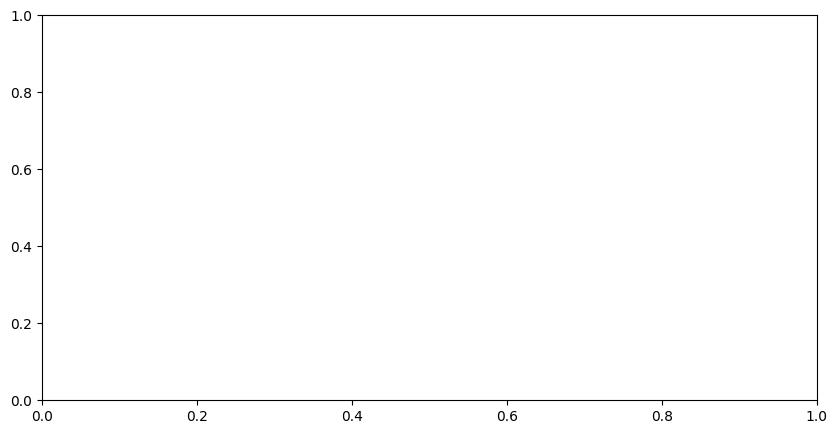

In [42]:
from keras import layers, models, Input, Model, Sequential
load_model = keras.models.load_model('./models/tuned_model_loss_0.7_0.7_acc_new_10_11.keras')
# Show the model architecture
# new_model.summary()

# new_model = Sequential(load_model)
# new_model.add(keras.layers.Lambda(lambda x: K.cast(K.argmax(x), dtype='float32')))
# new_model.add(keras.layers.Dense(1, activation='sigmoid'))

# new_model.compile(optimizer=keras.optimizers.Nadam(
#     learning_rate=1e-3
#      ), loss="sparse_categorical_crossentropy")

# history = new_model.fit(X, y,batch_size=32, epochs=10)
# # new_model.save("./models/test.h5")
# new_model = load_model
new_model = load_model
if(True):

    print("\n\n===================================================\n",y_test[:30])
    pred_label = []
    for prediction in preds:
        pred_label.append(np.argmax(prediction))
    pred_label = np.array(pred_label)
    print("",pred_label[:30])

    # GRAPH OF OUTPUT OCCURANCE:
    unique, counts = np.unique(pred_label, return_counts=True)
    unique, ycounts = np.unique(y_test, return_counts=True)

    fig = plt.figure(figsize = (10, 5))
    
    # creating the bar plot
    plt.bar(np.arange(6), counts, color ='green', 
            width = 0.3)
    plt.bar(np.arange(6), ycounts, color ='blue', 
            width = 0.2,alpha=0.5)
    
    plt.xlabel("classes-poses")
    plt.ylabel("occurrence")
    plt.title("prediction of CNN (not full) model")
    plt.show()
    evaluate = new_model.evaluate(X_test,y_test)

    plt.plot(y_test,color ='green', label="true value")
    plt.plot(pred_label,color ='red', linewidth=4, alpha=0.5,label="prediction")
    
    plt.xlabel("classes-poses")
    plt.ylabel("occurrence")
    plt.title("prediction of tuned model")
    plt.legend(ncol=1)

    plt.show()
    evaluate = new_model.evaluate(X_test,y_test)
    # model = new_model
    from keras.utils import plot_model
    import pydot
    import graphviz
    plot_model(new_model, to_file="./pic/model_0.7_0.7.png", show_shapes=True)

In [ ]:
preds = new_model.predict(X_test)
# np.argmax(prediction)
i = 1
print((preds[i]).astype(float))
# print(np.argmax(preds[i]))

 1/21 [>.............................] - ETA: 0s

21/21 [==============================] - 0s 7ms/step
[3.67361307e-02 4.26251143e-01 5.50138017e-12 5.10832979e-05
 5.36961615e-01 4.34521308e-09]
4


In [ ]:
# new_model = tf.keras.models.load_model('./models/model_0.5_40l_1c_new.keras')
# new_model = tf.keras.models.load_model('./models/model_0.4_40l_1c_new.keras')
# new_model = tf.keras.models.load_model('./models/tuned_model_loss_2_0.4_acc_new_9_11.keras')
new_model = tf.keras.models.load_model('./models/tuned_model_loss_0.7_0.7_acc_new_10_11.keras')
# Show the model architecture
new_model.summary()
pred_label = []

# preds = new_model.predict(X)
# evaluate = new_model.evaluate(X,y)
# print("\n\n===================================================\n",y[:30])


preds = new_model.predict(X_test)
print(evaluate)

print("\n\n===================================================\n",y_test[:30])

for prediction in preds:
    pred_label.append(np.argmax(prediction))
pred_label = np.array(pred_label)
print("",pred_label[:30])

# GRAPH OF OUTPUT OCCURANCE:
unique, counts = np.unique(pred_label, return_counts=True)
unique, ycounts = np.unique(y_test, return_counts=True)

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(np.arange(6), counts, color ='green', 
        width = 0.3)
plt.bar(np.arange(6), ycounts, color ='blue', 
        width = 0.2,alpha=0.5)
 
plt.xlabel("classes-poses")
plt.ylabel("occurrence")
plt.title("prediction of CNN (not full) model")
plt.show()
evaluate = new_model.evaluate(X_test,y_test)

plt.plot(y_test,color ='green', label="true value")
plt.plot(pred_label,color ='red', linewidth=4, alpha=0.5,label="prediction")
 
plt.xlabel("classes-poses")
plt.ylabel("occurrence")
plt.title("prediction of tuned model")
plt.legend(ncol=1)

plt.show()
evaluate = new_model.evaluate(X_test,y_test)
# model = new_model
from keras.utils import plot_model
import pydot
import graphviz
plot_model(new_model, to_file="./pic/model_0.7_0.7.png", show_shapes=True)

2023-11-11 09:02:23.915982: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-11 09:02:23.922780: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-11 09:02:23.923352: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 40, 40, 1)]       0         
                                                                 
 rescaling_22 (Rescaling)    (None, 40, 40, 1)         0         
                                                                 
 conv2d_38 (Conv2D)          (None, 38, 38, 64)        640       
                                                                 
 max_pooling2d_52 (MaxPooli  (None, 32, 32, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 32, 32, 64)        0         
                                                                 
 conv2d_39 (Conv2D)          (None, 28, 28, 32)        51232     
                                                          

2023-11-11 09:02:25.234403: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_21/dropout_19/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-11-11 09:02:25.783051: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2023-11-11 09:02:26.352299: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:188] failed to create cublas handle: the resource allocation failed
2023-11-11 09:02:26.352332: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:191] Failure to initialize cublas may be due to OOM (cublas needs some free memory when you initialize it, and your deep-learning framework may have preallocated more than its fair share), or may be because this binary was not built with support for the GPU in your machine.
2023-11-11 09:02:26.352928: W tensorflow/core/kernels/conv_ops_gpu.cc:144] None of the algorithm

NotFoundError: Graph execution error:

Detected at node model_21/conv2d_38/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/traitlets/config/application.py", line 1053, in launch_instance

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 737, in start

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 524, in dispatch_queue

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 513, in process_one

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 418, in dispatch_shell

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 758, in execute_request

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 426, in do_execute

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3046, in run_cell

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3101, in _run_cell

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3306, in run_cell_async

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3488, in run_ast_nodes

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3548, in run_code

  File "/tmp/ipykernel_150197/4209857175.py", line 15, in <module>

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/training.py", line 2631, in predict

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/training.py", line 2416, in predict_function

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/training.py", line 2401, in step_function

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/training.py", line 2389, in run_step

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/training.py", line 2357, in predict_step

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/training.py", line 589, in __call__

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/activations.py", line 306, in relu

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/backend.py", line 5397, in relu

No algorithm worked!  Error messages:
  Profiling failure on CUDNN engine eng11{}: UNKNOWN: CUDNN_STATUS_ALLOC_FAILED
in tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc(6629): 'status'
  Profiling failure on CUDNN engine eng0{}: UNKNOWN: CUDNN_STATUS_ALLOC_FAILED
in tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc(6629): 'status'
	 [[{{node model_21/conv2d_38/Relu}}]] [Op:__inference_predict_function_535]

# some activation function

In [ ]:
# # some activation functions
# SIGMOID

lim = 50

fig = plt.figure(figsize=(8, 4))
columns = 2
rows = 1

for i in range(1, columns*rows +1):
    x = np.linspace(-lim, lim, 100)
    fig.add_subplot(rows, columns, i)
    if (i==1):
        img = np.random.randint(10, size=(h,w))
        plt.title("S I G M O I D")
        # plt.imshow(X_tl[i-1]*255,cmap='gnuplot2')
        y =1/ (1+math.e **-x)

    else:
        plt.title("R E L U")
        y = []
        for i in x:
            y.append(max(0,i))

    plt.plot(x, y)
    
    
plt.show()
print(y[:(columns*rows)])


# tuning with tuner

In [9]:
def build_model(hp):
    inputs = keras.Input(shape=(w, h, 1))
    x = layers.Rescaling(scale=2)(inputs)

    # Number of layers of the CNN is also a hyperparameter.
    for i in range(hp.Int(f"Conv_1",min_value=1,max_value= 5)):
        x = layers.Conv2D(
            hp.Int(f"filters_{i}", 32, 64, step=5),
            kernel_size=(3, 3),
            activation="relu",
        )(x)
        x = keras.layers.Dropout(0.2)(x,training=True)  

        x = layers.MaxPooling2D(pool_size=(5, 5))(x)
    x = layers.Softmax()(x)
    
    for i in range(hp.Int(f"Denses_1",min_value=1,max_value= 3)):

        x = layers.Dense(
            units=hp.Int(f"units_{i}", 16, 32, step=5), activation="relu",
        )(x)
    x = keras.layers.Dropout(0.2)(x,training=True)  
    # for i in range(hp.Int(f"Conv_2",min_value=1,max_value= 5)):
    #     x = layers.Conv2D(
    #         hp.Int(f"filters_{i}", 32, 64, step=5),
    #         kernel_size=(3, 3),
    #         activation="relu",
    #     )(x)
    x = keras.layers.Dropout(0.2)(x,training=True)  

    # x = layers.MaxPooling2D(pool_size=(5, 5))(x)
    if hp.Boolean("dropout"):
        x = layers.Dropout(0.2)(x)
    for i in range(hp.Int(f"Denses_2",min_value=1,max_value= 3)):
        x = layers.Dense(
            units=hp.Int(f"units_{i}", 32, 128, step=32), activation="relu",
        )(x)
    if hp.Boolean("dropout"):
        x = layers.Dropout(0.5)(x)
    x = layers.Softmax()(x)

    x = keras.layers.GlobalAveragePooling2D()(x)
    
    num_classes = 6
    learning_rate = hp.Float(f"lr", min_value=1e-4, max_value=1e-2, sampling="log")
    outputs = layers.Dense(units=num_classes, activation="softmax")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer=keras.optimizers.Nadam(learning_rate=learning_rate), 
            loss="sparse_categorical_crossentropy",
        metrics=['accuracy'])

    return model


hp = keras_tuner.HyperParameters()
hp.values["dropout"] = True
model_tun = build_model(hp)
model_tun(X[:100])
model_tun.summary()

2023-11-16 21:16:11.925052: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 40, 40, 1)]       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 40, 40, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 32)        320       
                                                                 
 dropout_2 (Dropout)         (None, 38, 38, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 softmax_1 (Softmax)         (None, 7, 7, 32)          0         
                                                           

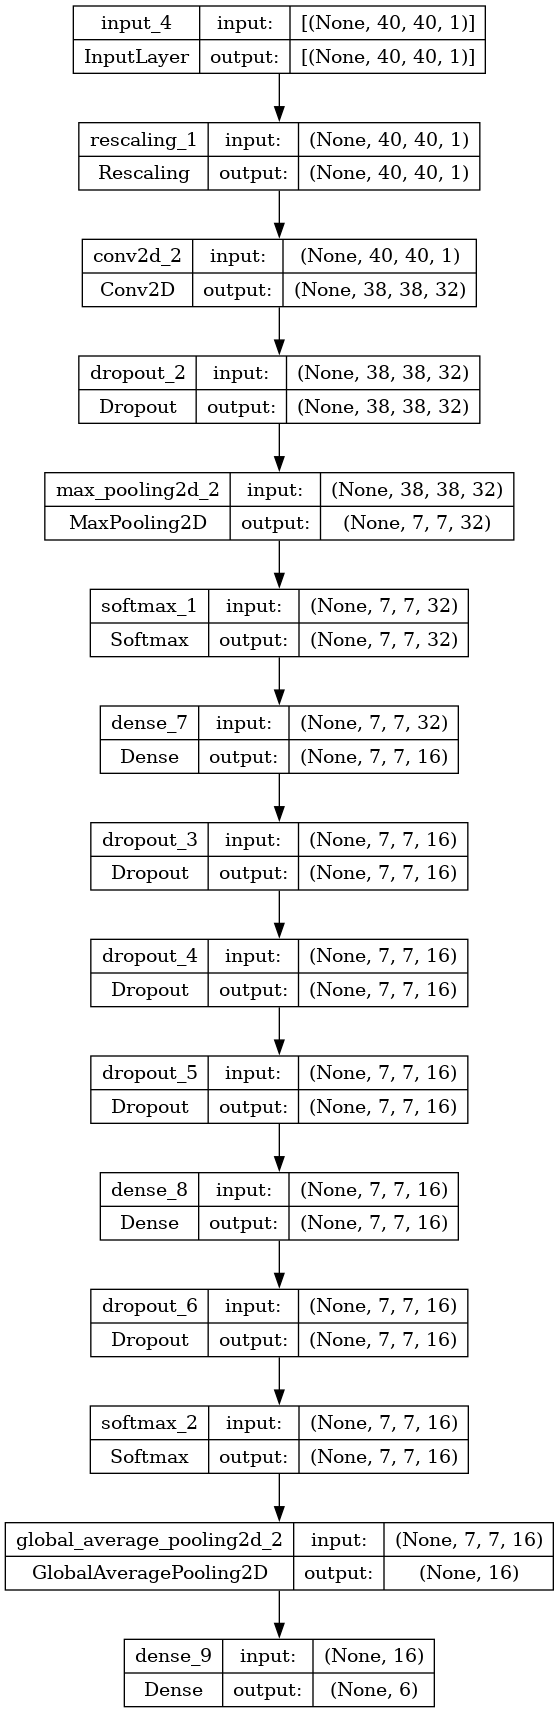

In [10]:
plot_model(model_tun, to_file="/tmp/model.png", show_shapes=True)


In [ ]:
tuner = keras_tuner.tuners.Hyperband(
    build_model,
    objective=['loss','accuracy'],
    max_epochs=2,
    executions_per_trial=2,
    directory='./models/checkpoints/',
    project_name='cyber_arm_tuner',
    )
print("================================================")

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
tuner.search(X, y, epochs=300, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=3)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first conv
layer is {best_hps.get('Conv_1')} and the optimal learning rate for the optimizer
is {best_hps.get('lr')}.
""")

# best_model.fit(x=X, y=y, epochs=1)


Reloading Tuner from ./models/checkpoints/cyber_arm_tuner/tuner0.json

The hyperparameter search is complete. The optimal number of units in the first conv
layer is 2 and the optimal learning rate for the optimizer
is 0.00021923887986249234.



In [ ]:
tuner.search_space_summary()

In [ ]:

log_dir = "./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
my_callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1),
    tf.keras.callbacks.EarlyStopping(patience=100,monitor='loss'),
    tf.keras.callbacks.ModelCheckpoint(
        filepath='./models/checkpoints/model_tuned.{epoch:02d}-{loss:.2f}.h5',
        monitor='loss',
        mode='max',
        save_freq=50,
        save_best_only=True
        ),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
    # tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.0000000000000000001, patience=10)
]
model = tuner.hypermodel.build(best_hps)
model.summary()
history = model.fit(X, y, epochs=30000, validation_split=0.2,callbacks=my_callbacks)

val_acc_per_epoch = history.history['accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 40, 40, 1)]       0         
                                                                 
 rescaling_8 (Rescaling)     (None, 40, 40, 1)         0         
                                                                 
 conv2d_20 (Conv2D)          (None, 38, 38, 37)        370       
                                                                 
 dropout_29 (Dropout)        (None, 38, 38, 37)        0         
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 7, 7, 37)          0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 5, 5, 32)          10688     
                                                           

2023-11-11 07:53:36.537978: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_3/dropout_29/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


9/9 [==============================] - 4s 59ms/step - loss: 1.7936 - accuracy: 0.1604 - val_loss: 1.7896 - val_accuracy: 0.1912
Epoch 2/30000
9/9 [==============================] - 0s 30ms/step - loss: 1.7935 - accuracy: 0.1604 - val_loss: 1.7898 - val_accuracy: 0.1912
Epoch 3/30000
9/9 [==============================] - 0s 33ms/step - loss: 1.7935 - accuracy: 0.1604 - val_loss: 1.7899 - val_accuracy: 0.1912
Epoch 4/30000
9/9 [==============================] - 0s 30ms/step - loss: 1.7934 - accuracy: 0.1604 - val_loss: 1.7901 - val_accuracy: 0.1912
Epoch 5/30000
9/9 [==============================] - 0s 29ms/step - loss: 1.7934 - accuracy: 0.1604 - val_loss: 1.7902 - val_accuracy: 0.1912
Epoch 6/30000
9/9 [==============================] - 0s 36ms/step - loss: 1.7933 - accuracy: 0.1604 - val_loss: 1.7903 - val_accuracy: 0.1912
Epoch 7/30000
9/9 [==============================] - 0s 32ms/step - loss: 1.7932 - accuracy: 0.1604 - val_loss: 1.7904 - val_accuracy: 0.1912
Epoch 8/30000
9/9 [=

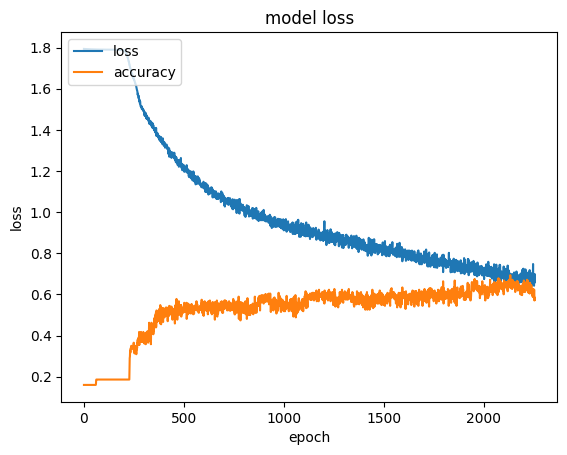

In [ ]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()

21/21 [==============================] - 0s 6ms/step


 [5 3 3 0 3 0 4 2 1 3 4 1 3 2 1 4 0 4 5 4 5 5 1 2 0 5 0 3 3 2]
 [5 2 5 2 5 0 4 5 3 2 4 3 5 2 3 4 4 4 5 3 2 2 3 2 1 5 3 2 5 5]


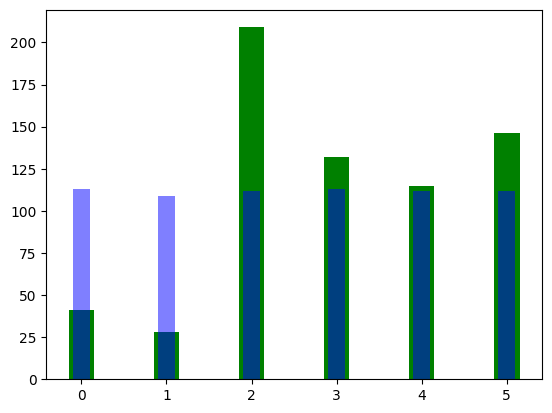

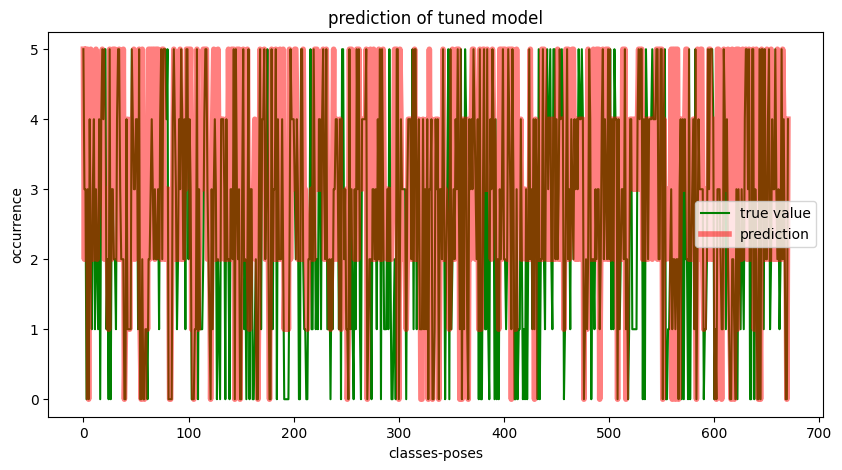

21/21 [==============================] - 0s 6ms/step - loss: 2.3405 - accuracy: 0.3800
[2.340508222579956, 0.3800297975540161]


In [ ]:
preds = model.predict(X_test)
# preds = new_model.predict(X_test)
pred_label=[]
print("\n\n===================================================\n",y_test[:30])

for prediction in preds:
    pred_label.append(np.argmax(prediction))
pred_label = np.array(pred_label)
print("",pred_label[:30])

# GRAPH OF OUTPUT OCCURANCE:
unique, counts = np.unique(pred_label, return_counts=True)
unique, ycounts = np.unique(y_test, return_counts=True)

 
# creating the bar plot
plt.bar(np.arange(6), counts, color ='green', 
        width = 0.3)
plt.bar(np.arange(6), ycounts, color ='blue', 
        width = 0.2,alpha=0.5)
plt.show()
 
fig = plt.figure(figsize = (10, 5))

# PRED GRAPH
plt.plot(y_test,color ='green', label="true value")
plt.plot(pred_label,color ='red', linewidth=4, alpha=0.5,label="prediction")


plt.xlabel("classes-poses")
plt.ylabel("occurrence")
plt.title("prediction of tuned model")
plt.legend(ncol=1)

plt.show()
evaluate = model.evaluate(X_test,y_test)
print(evaluate)


In [ ]:
# model.save("./models/tuned_model_loss_0.3_0.9_acc.keras")

In [ ]:
evaluate = model.evaluate(X_test,y_test)

In [ ]:
new_model = tf.keras.models.load_model('./models/tuned_model_loss_0.2_0.9_acc.keras')
# new_model = tf.keras.models.load_model('./models/model_0.4_40l_1c_new.keras')

# Show the model architecture
new_model.summary()
pred_label = []

# preds = new_model.predict(X)
# evaluate = new_model.evaluate(X,y)
# print("\n\n===================================================\n",y[:30])


preds = new_model.predict(X_test)
print(evaluate)

print("\n\n===================================================\n",y_test[:30])

for prediction in preds:
    pred_label.append(np.argmax(prediction))
pred_label = np.array(pred_label)
print("",pred_label[:30])

# GRAPH OF OUTPUT OCCURANCE:
unique, counts = np.unique(pred_label, return_counts=True)
unique, ycounts = np.unique(y_test, return_counts=True)

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(np.arange(6), counts, color ='green', 
        width = 0.3)
plt.bar(np.arange(6), ycounts, color ='blue', 
        width = 0.2,alpha=0.5)
plt.show()

plt.plot(y_test,color ='green', label="true value")
plt.plot(pred_label,color ='red', linewidth=4, alpha=0.5,label="prediction")
 
plt.xlabel("classes-poses")
plt.ylabel("occurrence")
plt.title("prediction of tuned model")
plt.legend(ncol=1)

plt.show()
evaluate = new_model.evaluate(X_test,y_test)





Model: "model_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_59 (InputLayer)       [(None, 40, 40, 1)]       0         
                                                                 
 rescaling_60 (Rescaling)    (None, 40, 40, 1)         0         
                                                                 
 conv2d_112 (Conv2D)         (None, 38, 38, 64)        640       
                                                                 
 max_pooling2d_138 (MaxPool  (None, 34, 34, 64)        0         
 ing2D)                                                          
                                                                 
 dropout_51 (Dropout)        (None, 34, 34, 64)        0         
                                                                 
 conv2d_113 (Conv2D)         (None, 30, 34, 32)        10272     
                                                          

2023-11-11 11:00:39.118061: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_54/dropout_51/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-11-11 11:00:39.148280: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:188] failed to create cublas handle: the resource allocation failed
2023-11-11 11:00:39.148303: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:191] Failure to initialize cublas may be due to OOM (cublas needs some free memory when you initialize it, and your deep-learning framework may have preallocated more than its fair share), or may be because this binary was not built with support for the GPU in your machine.
2023-11-11 11:00:39.148357: W tensorflow/core/kernels/conv_ops_gpu.cc:144] None of the algorithms provided by cuDNN frontend heuristics worked; trying fallback algorithms.  Conv: batch: 32
in_depths: 1
out_depths: 

NotFoundError: Graph execution error:

Detected at node model_54/conv2d_112/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/traitlets/config/application.py", line 1053, in launch_instance

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 737, in start

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 524, in dispatch_queue

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 513, in process_one

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 418, in dispatch_shell

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 758, in execute_request

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 426, in do_execute

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3046, in run_cell

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3101, in _run_cell

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3306, in run_cell_async

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3488, in run_ast_nodes

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3548, in run_code

  File "/tmp/ipykernel_150197/3263376315.py", line 13, in <module>

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/training.py", line 2631, in predict

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/training.py", line 2416, in predict_function

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/training.py", line 2401, in step_function

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/training.py", line 2389, in run_step

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/training.py", line 2357, in predict_step

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/training.py", line 589, in __call__

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/activations.py", line 306, in relu

  File "/media/james/Datasets_Drive1/miniconda/envs/test/lib/python3.11/site-packages/keras/src/backend.py", line 5397, in relu

No algorithm worked!  Error messages:
  Profiling failure on CUDNN engine eng11{}: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16777216 bytes.
  Profiling failure on CUDNN engine eng0{}: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16777216 bytes.
	 [[{{node model_54/conv2d_112/Relu}}]] [Op:__inference_predict_function_52476]

In [ ]:
# model
# new_model
two_nn_dt = tf.reduce_mean(
    tf.stack([model, new_model], axis=0), axis=0)


ValueError: Attempt to convert a value (<keras.src.engine.functional.Functional object at 0x7f7bf486a610>) with an unsupported type (<class 'keras.src.engine.functional.Functional'>) to a Tensor.

# ALGO
## Random Forest

In [ ]:
import math
import urllib
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_decision_forests as tfdf


In [ ]:
dataset_train

In [ ]:
print(dataset_test_ar[0][-1])
column_name =np.array(list(range(n*2+1)))
column_name=column_name+1
column_name=column_name.astype('str')
column_name
us = pd.DataFrame(dataset_test_ar,columns=column_name)

5.0


In [ ]:
us

1         2         3         4         5         6         7  \
0    0.000571  0.000487  0.000905  0.000738  0.000487  0.000571  0.000320   
1    0.000404  0.000404  0.000571  0.000655  0.001073  0.000822  0.000320   
2    0.000404  0.000320  0.000487  0.000069  0.000738  0.000905  0.000153   
3   -0.000599 -0.000683 -0.000599 -0.000683 -0.000098  0.001156  0.001240   
4    0.001658  0.000738 -0.000934  0.000822  0.002410  0.001240 -0.000850   
..        ...       ...       ...       ...       ...       ...       ...   
666  0.000822  0.000905  0.000404  0.000320  0.000237  0.000822  0.000571   
667  0.000738  0.000487  0.000655  0.000822  0.000237  0.000404  0.000404   
668  0.000320  0.000320  0.000404  0.000487  0.000655  0.000989  0.000738   
669  0.000655  0.000571  0.000404  0.000069  0.000237  0.000069  0.000237   
670  0.000571  0.000571  0.000655  0.000069  0.000404  0.000237  0.000237   

            8         9        10  ...      1592      1593      1594  \
0    0.000487  0.000738  0.000905  ...  0.000367  0.000218  0.000144   
1    0.000655  0.000655  0.000237  ...  0.001859  0.004171  0.003798   
2    0.000404  0.000320  0.000738  ...  0.000144  0.000442  0.000517   
3   -0.000348  0.000571  0.000404  ... -0.003735 -0.002989  0.001262   
4    0.002995  0.002995 -0.000348  ...  0.000367  0.000964  0.003276   
..        ...       ...       ...  ...       ...       ...       ...   
666 -0.000014 -0.000098  0.000069  ...  0.000442  0.000367  0.000218   
667  0.000069 -0.000014  0.001240  ...  0.001039  0.000964  0.001039   
668  0.000069 -0.000014  0.000404  ...  0.000666  0.000293  0.000367   
669  0.000487  0.000655  0.000738  ...  0.000442  0.001113  0.000293   
670 -0.000014  0.000822  0.001240  ...  0.000517  0.000517  0.000218   

         1595      1596      1597      1598      1599      1600  1601  
0    0.000293  0.000069 -0.000229  0.000293  0.000740  0.001188   5.0  
1   -0.003959 -0.005077 -0.000155  0.001188  0.004321  0.006633   4.0  
2    0.000740  0.000666  0.000517  0.000591  0.000591  0.000218   5.0  
3    0.002605  0.003351  0.003202  0.003724 -0.000155 -0.003213   4.0  
4    0.002381 -0.003362 -0.009627 -0.002467  0.003425  0.005365   4.0  
..        ...       ...       ...       ...       ...       ...   ...  
666  0.000218  0.000591  0.000591  0.000442  0.000442  0.000591   0.0  
667  0.000591  0.000442  0.000144  0.000367  0.000144  0.000367   3.0  
668  0.000293  0.000367  0.000144  0.000442  0.000815  0.000964   5.0  
669 -0.000155 -0.000304  0.000442  0.000293  0.000815  0.001039   5.0  
670  0.000144  0.000218 -0.000080  0.000442  0.000890  0.000666   3.0  

[671 rows x 1601 columns]

In [ ]:
dataset_train_ar.shape

(337, 1601)

In [ ]:


# Specify the model.
# inputs = tf.keras.layers.Input(shape=(2))
inputs = keras.Input(shape=(img_w_h_len, img_w_h_len, 1))

output = tfdf.keras.RandomForestModel(num_trees=1000, random_seed=1234,verbose=2)(inputs)

model_1 = tf.keras.models.Model(inputs, output)
model_1.compile(optimizer=tf.keras.optimizers.Nadam(
    learning_rate=1e-3,),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"])

# Train the model.
model_1.fit( X,y,epochs = 1000,validation_split=0.2)

test_sample = 100
evaluate = model_1.evaluate(X_test[:test_sample],y_test[:test_sample])


Use 12 thread(s) for training
Use /tmp/tmpwv8qz6we as temporary training directory


Epoch 1/1000


9/9 [==============================] - 0s 28ms/step - loss: 37.8456 - accuracy: 0.1784 - val_loss: 40.3771 - val_accuracy: 0.1324
Epoch 2/1000
9/9 [==============================] - 0s 8ms/step - loss: 37.8456 - accuracy: 0.1784 - val_loss: 40.3771 - val_accuracy: 0.1324
Epoch 3/1000
9/9 [==============================] - 0s 9ms/step - loss: 37.8456 - accuracy: 0.1784 - val_loss: 40.3771 - val_accuracy: 0.1324
Epoch 4/1000
9/9 [==============================] - 0s 8ms/step - loss: 37.8456 - accuracy: 0.1784 - val_loss: 40.3771 - val_accuracy: 0.1324
Epoch 5/1000
9/9 [==============================] - 0s 7ms/step - loss: 37.8456 - accuracy: 0.1784 - val_loss: 40.3771 - val_accuracy: 0.1324
Epoch 6/1000
9/9 [==============================] - 0s 7ms/step - loss: 37.8456 - accuracy: 0.1784 - val_loss: 40.3771 - val_accuracy: 0.1324
Epoch 7/1000
9/9 [==============================] - 0s 8ms/step - loss: 37.8456 - accuracy: 0.1784 - val_loss: 40.3771 - val_accuracy: 0.1324
Epoch 8/1000
9/9 [

In [ ]:
preds = model_1.predict(X_test[:test_sample])
preds

4/4 [==============================] - 0s 2ms/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [ ]:
# inputs = keras.Input(shape=(392*2,1))
# input_dim = int(math.sqrt(n*2))
inputs = keras.Input(shape=(img_w_h_len, img_w_h_len, 1))
# inputs = keras.Input(shape=(input_dim,input_dim))

# input_layer = layers.Rescaling(2)(inputs)
input_layer = layers.Rescaling(2)(inputs)


In [ ]:
x = layers.Dense(128, activation="relu")(input_layer)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
num_classes = 6
x = keras.layers.GlobalAveragePooling2D()(x)

outputs = layers.Dense(num_classes, activation="softmax")(x)

NN_model_1_pred = outputs
NN_model_2_pred = outputs



In [ ]:
Model_rf_1_pred = tfdf.keras.RandomForestModel(num_trees=1000, random_seed=1234,verbose=2)(input_layer)
# Model_rf_1_pred.summary()

Use 12 thread(s) for training
Use /tmp/tmp3kwjoo4s as temporary training directory


In [ ]:
# # Train a Gradient Boosted Trees model.
# model = tfdf.keras.GradientBoostedTreesModel(num_trees=1500)
lbel_index = n*n
train_ds_pred = tfdf.keras.pd_dataframe_to_tf_dataset(us,label=str(n*2+1))

# Specify the model.
# Model_rf_1_pred = tfdf.keras.RandomForestModel(verbose=2).predict(input_layer)
Model_rf_1_pred = tfdf.keras.RandomForestModel(num_trees=100, random_seed=1234,verbose=2)(input_layer)

# # Train the model/
# Model_rf_1 = keras.Model(inputs=inputs, outputs=outputs)
# Model_rf_1.summary()
# Model_rf_1.compile(optimizer=keras.optimizers.Nadam(
#     learning_rate=1e-3
#      ), loss="sparse_categorical_crossentropy")
# Model_rf_1.fit(X,y,batch_size=64, epochs=10)
# Model_rf_1(X_test)

Use 12 thread(s) for training
Use /tmp/tmpv__ltbnf as temporary training directory


In [ ]:
TF_NN = tf.reduce_mean(
    tf.stack([NN_model_1_pred, Model_rf_1_pred], axis=0), axis=0)

# Keras Models
# ============

TF_NN = keras.Model(inputs=inputs, outputs=outputs)

from keras.utils import plot_model

plot_model(TF_NN, to_file="/tmp/model.png", show_shapes=True)

ValueError: Exception encountered when calling layer "tf.stack_5" (type TFOpLambda).

Dimension 1 in both shapes must be equal, but are 6 and 1. Shapes are [?,6] and [?,1].
	From merging shape 0 with other shapes. for '{{node tf.stack_5/stack_1}} = Pack[N=2, T=DT_FLOAT, axis=0](Placeholder, Placeholder_1)' with input shapes: [?,6], [?,1].

Call arguments received by layer "tf.stack_5" (type TFOpLambda):
  • values=['tf.Tensor(shape=(None, 6), dtype=float32)', 'tf.Tensor(shape=(None, 1), dtype=float32)']
  • axis=0
  • name=stack

In [ ]:
NN_model_1_pred
NN_model_2_pred
TF_NN = tf.reduce_mean(
    tf.stack([NN_model_1_pred, Model_rf_1_pred], axis=0), axis=0)

# Keras Models
# ============

TF_NN = keras.Model(inputs=inputs, outputs=outputs)

from keras.utils import plot_model

plot_model(TF_NN, to_file="/tmp/model.png", show_shapes=True)

# Bluetooth <placeholder>

In [ ]:
import bluetooth

nearby_devices = bluetooth.discover_devices(lookup_names=True)
print("Found {} devices.".format(len(nearby_devices)))

for addr, name in nearby_devices:
    print("  {} - {}".format(addr, name))

# COMBINE


In [6]:
test_sample = 10
test_X_sample_rate = np.array_split(X_test,len(y_test)/(test_sample))
test_y_sample_rate = np.array_split(y_test,len(y_test)/(test_sample))
# np.array(test_X_sample_rate).shape
print(len(test_X_sample_rate))
np.array(test_X_sample_rate[1]).shape
# np.array(test_y_sample_rate)
test_y_sample_rate
tempt_y = []
for ys in test_y_sample_rate:
    tempt_y.append(ys[0])
test_y_sample_rate = tempt_y
test_y_sample_rate = np.array(test_y_sample_rate)
test_y_sample_rate

13


array([0, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5], dtype=uint8)

In [1]:
load_model_1 = keras.models.load_model('./models/tuned_model_loss_0.7_0.7_acc_new_10_11.keras')
load_model_2 = keras.models.load_model('./models/model_0.5_40l_1c_new.keras')
load_model_3 = keras.models.load_model('./models/model_0.4_40l_1c_new.keras')
# load_model_2 = model

NameError: name 'keras' is not defined

In [ ]:
from keras import layers, models, Input, Model, Sequential
start_idx = 114
test_sample = 10 
end_idx= start_idx + test_sample


# Show the model architecture
# new_model.summary()


# history_1 = load_model_1.fit(X, y,batch_size=32, epochs=10)
# history_2 = load_model_2.fit(X, y,batch_size=32, epochs=10)

preds_1 = load_model_1.predict(X_test[start_idx:end_idx])
preds_2 = load_model_2.predict(X_test[start_idx:end_idx])
# preds_3 = load_model_3.predict(X_test[start_idx:end_idx])
# preds = (preds_1 + preds_2 + preds_3)/3
preds = preds_1 + preds_2
y_test[start_idx:end_idx]


1/1 [==============================] - 0s 205ms/step


2023-11-15 17:48:01.158149: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_21/dropout_19/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1/1 [==============================] - 0s 245ms/step


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [ ]:



pred_c = []
pred_c.append(preds_1)
pred_c.append(preds_2)
pred_c.append(preds_3)
pred_c
preds_label_c = []
for pred in pred_c:
    pred_label = []
    for prediction in preds:
        pred_label.append(np.argmax(prediction))
    pred_label = np.array(pred_label)
    preds_label_c.append(pred_label)
preds_label_c = np.array(preds_label_c)
preds_label_c


array([[4, 1, 4, 4, 1, 0, 4, 4, 1, 1],
       [4, 1, 4, 4, 1, 0, 4, 4, 1, 1],
       [4, 1, 4, 4, 1, 0, 4, 4, 1, 1]])

In [16]:
def max_voting(List):
    counter = 0
    num = List[0]
     
    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
 
    return num


In [ ]:
ensemble_pred = []
for i in np.arange(test_sample+1):
    i=i-1
    arr = []
    for pred in preds_label_c:
        arr.append(pred[i])
    ensemble_pred.append(max_voting(arr))
ensemble_pred
max_voting(ensemble_pred)


1

In [ ]:
preds[0]

array([3.3907849e-02, 1.6027591e-01, 8.2320190e-10, 6.5885001e-01,
       1.4696623e-01, 1.6406714e-08], dtype=float32)

1/2 [==============>...............] - ETA: 0s

2/2 [==============================] - 0s 111ms/step


 [5 4 0 3 1 2 0 5 1 4 0 2 4 1 5 5 5 5 1 1 3 3 1 4 3 4 1 0 0 1 2 0 2 4 3 3 4
 5 2 3 1 2 0 5 2 1 1 3 5 0 2 3 2 2 0]
 [3 2 1 4 2 3 5 2 4 4 5 5 1 1 3 4 4 3 3 4 2 0 2 4 3 3 4 2 2 5 4 2 3 2 2 1 4
 2 2 3 2 2 2 2 3]


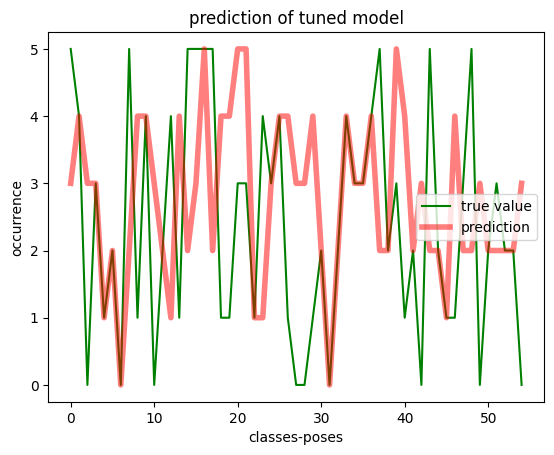

In [302]:
if(True):
    start_idx = 10
    test_sample = 55
    end_idx = start_idx + test_sample
    preds = load_model_1.predict(X_test[start_idx:end_idx])


    print("\n\n===================================================\n",y_test[start_idx:end_idx])
    pred_label = []
    for prediction in preds:
        pred_label.append(np.argmax(prediction))
    pred_label = np.array(pred_label)
    print("",pred_label[start_idx:end_idx])

    # GRAPH OF OUTPUT OCCURANCE:
    unique, counts = np.unique(pred_label, return_counts=True)
    unique, ycounts = np.unique(y_test, return_counts=True)



    plt.plot(y_test[start_idx:end_idx],color ='green', label="true value")
    plt.plot(pred_label,color ='red', linewidth=4, alpha=0.5,label="prediction")
    
    plt.xlabel("classes-poses")
    plt.ylabel("occurrence")
    plt.title("prediction of tuned model")
    plt.legend(ncol=1)

    plt.show()
    # model = new_model


## predict by sample

In [26]:
def max_voting(List):
    counter = 0
    num = List[0]
     
    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
 
    return num


In [4]:
load_model_1 = keras.models.load_model('./models/tuned_model_loss_0.7_0.7_acc_new_10_11.keras')
load_model_2 = keras.models.load_model('./models/tuned_model_loss_5.0_0.1_acc_us_15_11.keras')
# load_model_3 = model
load_model_3 = keras.models.load_model('./models/tuned_model_loss_2_0.4_acc_new_9_11.keras')
load_model_4 = load_model_1
# load_model_4 = keras.models.load_model('./models/tuned_model_loss_2_0.4_acc_new_9_11.keras')
# load_model_3 = keras.models.load_model('./models/model_0.4_40l_1c_new.keras')

2023-11-25 08:40:06.733825: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-25 08:40:06.739632: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-25 08:40:06.740023: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [6]:
test_sample = 1

In [22]:
test_X_sample_rate = np.array_split(X_test,len(y_test)/(test_sample))
test_y_sample_rate = np.array_split(y_test,len(y_test)/(test_sample))
print(len(test_X_sample_rate))
np.array(test_X_sample_rate[1]).shape
tempt_y = []
for ys in test_y_sample_rate:
    tempt_y.append(ys[0])
test_y_sample_rate = tempt_y
test_y_sample_rate = np.array(test_y_sample_rate)
test_y_sample_rate



671


array([0, 0, 4, 3, 0, 3, 5, 1, 1, 0, 2, 1, 2, 0, 0, 5, 0, 2, 2, 4, 3, 3,
       1, 3, 2, 2, 3, 0, 2, 4, 3, 4, 5, 0, 0, 4, 4, 1, 5, 3, 5, 2, 4, 2,
       4, 4, 1, 4, 3, 4, 2, 2, 3, 0, 5, 2, 4, 5, 0, 2, 5, 4, 1, 4, 3, 4,
       1, 1, 2, 5, 1, 2, 3, 0, 0, 2, 4, 1, 0, 0, 1, 0, 5, 2, 3, 5, 3, 4,
       0, 3, 5, 4, 5, 4, 1, 5, 1, 1, 0, 2, 0, 1, 2, 0, 0, 3, 5, 1, 4, 5,
       2, 1, 1, 4, 5, 4, 4, 2, 2, 1, 5, 2, 3, 1, 1, 4, 3, 2, 1, 2, 4, 0,
       4, 5, 5, 0, 1, 0, 3, 5, 4, 0, 5, 0, 5, 0, 3, 2, 2, 1, 0, 5, 5, 5,
       5, 1, 3, 0, 1, 4, 4, 0, 1, 3, 4, 3, 0, 4, 4, 4, 4, 1, 2, 5, 3, 3,
       0, 0, 2, 4, 2, 0, 5, 1, 1, 2, 2, 0, 0, 3, 1, 2, 0, 0, 4, 3, 5, 0,
       0, 1, 1, 2, 3, 4, 1, 1, 0, 0, 0, 5, 3, 5, 5, 1, 5, 0, 4, 4, 5, 2,
       2, 2, 0, 3, 4, 2, 0, 5, 1, 4, 2, 4, 4, 2, 4, 2, 2, 2, 1, 0, 4, 0,
       1, 3, 2, 4, 2, 5, 5, 1, 2, 0, 3, 4, 3, 0, 5, 3, 4, 4, 2, 1, 1, 3,
       4, 5, 5, 1, 2, 1, 0, 0, 3, 1, 3, 0, 1, 4, 0, 0, 1, 3, 2, 4, 5, 0,
       3, 2, 0, 3, 4, 3, 4, 3, 4, 5, 3, 1, 2, 1, 3,

In [24]:
lasdfkn = test_X_sample_rate

In [27]:
pred_rate = []
for X_test_rate in test_X_sample_rate:
    preds_1 = load_model_1.predict(X_test_rate)
    preds_2 = load_model_2.predict(X_test_rate)
    preds_3 = load_model_3.predict(X_test_rate)

    pred_c = []
    pred_c.append(preds_1)
    pred_c.append(preds_2)
    pred_c.append(preds_3)
    pred_c = np.array(pred_c)
    pred_c[0]

    t = pred_c[0]

    preds_label_c = []
    for preds in pred_c:
        pred_label = []
        for prediction in preds:
            pred_label.append(np.argmax(prediction))
        pred_label = np.array(pred_label)
        preds_label_c.append(pred_label)
    preds_label_c = np.array(preds_label_c)

    ensemble_pred = []
    for i in np.arange(len(X_test_rate)):
        i=i
        arr = []
        for pred in preds_label_c:
            arr.append(pred[i])
        ensemble_pred.append(max_voting(arr))
    pred_rate.append(max_voting(ensemble_pred))
# max_voting(pred_rate)
pred_rate = np.array(pred_rate)


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


In [14]:
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
a = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5], dtype='uint8')
b = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 4, 1, 1, 3, 3, 3, 4, 1, 4, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4, 3, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 5, 2, 2, 2, 2, 5, 2, 2, 5,
       5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 1, 3, 3, 4,
       3, 1, 5, 5, 5, 2, 3, 5, 5, 5, 3, 5, 5, 5, 5, 2, 2, 2, 2, 5, 5, 5,
       3, 5])

matrix1_flat = a.flatten()
matrix2_flat = b.flatten()

similarity_ratio = cosine_similarity([matrix1_flat], [matrix2_flat])[0][0]
print(similarity_ratio)

0.9071463261468489


In [74]:
import difflib

l1 = a
l2 = b

sm = difflib.SequenceMatcher(None,l1,l2)
sm.ratio()


0.6567164179104478

In [28]:
pred_rate

array([3, 3, 4, 3, 0, 3, 2, 4, 4, 4, 2, 4, 2, 1, 3, 3, 3, 2, 2, 1, 3, 3,
       4, 2, 2, 2, 3, 3, 2, 4, 5, 1, 2, 3, 3, 3, 1, 4, 3, 5, 2, 2, 1, 2,
       4, 1, 4, 1, 3, 4, 2, 2, 2, 3, 2, 2, 4, 2, 3, 2, 2, 1, 4, 4, 3, 4,
       1, 4, 2, 2, 4, 2, 5, 3, 3, 2, 4, 1, 3, 3, 4, 3, 5, 2, 3, 2, 3, 4,
       3, 5, 5, 1, 2, 4, 4, 2, 1, 4, 3, 2, 0, 4, 2, 3, 3, 5, 2, 4, 4, 2,
       2, 1, 4, 4, 5, 4, 3, 2, 5, 3, 5, 2, 3, 4, 4, 4, 3, 2, 4, 2, 1, 3,
       4, 5, 2, 0, 1, 3, 2, 3, 3, 3, 5, 1, 5, 3, 5, 2, 2, 4, 0, 5, 2, 3,
       2, 4, 3, 3, 4, 4, 4, 3, 1, 2, 1, 2, 3, 4, 4, 0, 0, 4, 2, 2, 5, 5,
       3, 3, 2, 0, 2, 0, 2, 1, 1, 2, 2, 3, 3, 3, 3, 2, 3, 3, 1, 5, 2, 3,
       3, 4, 4, 2, 1, 4, 1, 4, 3, 3, 3, 5, 3, 5, 2, 4, 2, 3, 4, 0, 2, 2,
       2, 2, 3, 3, 0, 2, 3, 3, 4, 4, 2, 4, 0, 2, 1, 2, 2, 2, 4, 0, 1, 3,
       4, 3, 2, 4, 2, 2, 5, 4, 2, 3, 5, 1, 3, 3, 2, 5, 4, 1, 2, 4, 4, 5,
       1, 5, 5, 4, 2, 4, 3, 0, 3, 4, 3, 3, 4, 4, 3, 0, 1, 3, 2, 4, 2, 3,
       3, 2, 3, 5, 4, 5, 1, 5, 1, 5, 5, 4, 2, 4, 5,



========================= test_y_sample_rate ==========================
 [0 0 4 3 0 3 5 1 1 0 2 1 2 0 0 5 0 2 2 4 3 3 1 3 2 2 3 0 2 4 3 4 5 0 0 4 4
 1 5 3 5 2 4 2 4 4 1 4 3 4 2 2 3 0 5 2 4 5 0 2 5 4 1 4 3 4 1 1 2 5 1 2 3 0
 0 2 4 1 0 0 1 0 5 2 3 5 3 4 0 3 5 4 5 4 1 5 1 1 0 2 0 1 2 0 0 3 5 1 4 5 2
 1 1 4 5 4 4 2 2 1 5 2 3 1 1 4 3 2 1 2 4 0 4 5 5 0 1 0 3 5 4 0 5 0 5 0 3 2
 2 1 0 5 5 5 5 1 3 0 1 4 4 0 1 3 4 3 0 4 4 4 4 1 2 5 3 3 0 0 2 4 2 0 5 1 1
 2 2 0 0 3 1 2 0 0 4 3 5 0 0 1 1 2 3 4 1 1 0 0 0 5 3 5 5 1 5 0 4 4 5 2 2 2
 0 3 4 2 0 5 1 4 2 4 4 2 4 2 2 2 1 0 4 0 1 3 2 4 2 5 5 1 2 0 3 4 3 0 5 3 4
 4 2 1 1 3 4 5 5 1 2 1 0 0 3 1 3 0 1 4 0 0 1 3 2 4 5 0 3 2 0 3 4 3 4 3 4 5
 3 1 2 1 3 5 1 1 3 1 5 3 3 0 5 4 1 3 1 0 2 2 4 4 1 4 5 5 4 3 1 3 1 0 1 4 4
 5 3 4 2 2 2 4 1 5 5 0 3 4 5 3 0 1 5 5 5 5 1 3 3 1 4 5 1 1 2 3 5 5 4 5 0 4
 1 0 4 3 2 2 1 3 3 3 3 4 3 5 4 1 2 3 2 2 0 0 5 4 2 0 2 5 4 4 1 3 2 2 5 5 2
 4 2 1 5 5 2 3 1 5 1 2 0 0 3 2 4 4 2 5 5 1 2 2 4 0 5 0 5 2 2 2 0 5 4 2 3 2
 1 2 2 4 5 3 0 0 0 4 5 5 

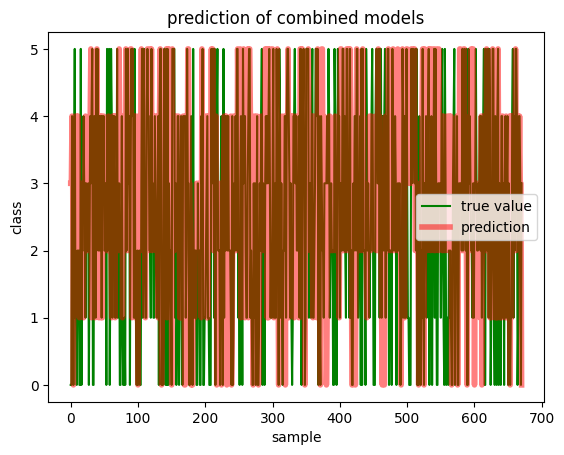

In [33]:
    print("\n\n========================= test_y_sample_rate ==========================\n",test_y_sample_rate)
    print("\n\n====================== pred_rate =============================\n",pred_rate)


    plt.plot(test_y_sample_rate,color ='green', label="true value")
    plt.plot(pred_rate,color ='red', linewidth=4, alpha=0.5,label="prediction")
    
    plt.xlabel("sample")
    plt.ylabel("class")
    plt.title("prediction of combined models")
    plt.legend(ncol=1)

    plt.show()
    # model = new_model

In [31]:
# matrix1_flat = a.flatten()
# matrix2_flat = b.flatten()
matrix1_flat = test_y_sample_rate
matrix2_flat = pred_rate

similarity_ratio = cosine_similarity([matrix1_flat], [matrix2_flat])[0][0]
print(similarity_ratio)

0.7639559750193156


In [32]:
val = str(pred_rate[0])+";"
val

'3;'

In [ ]:
if False:
    import serial
    import time

    arduino = serial.Serial(port='/dev/ttyUSB0',   baudrate=9600, timeout=.1)


    def write_read(x):
        arduino.write(bytes(x,   'utf-8'))
        time.sleep(0.05)
        data = arduino.readline()
        return   data


    # while True:
    idxs = 0
    while idxs <=len(pred_rate):
        # num = input("Enter a number: ")
        val = str(pred_rate[idxs])+";"
        value   = write_read(val)
        # value   = write_read(pred_rate[idxs])
        print(value)


In [1]:
pred_rate =  [0, 0, 3, 3, 2, 2, 3, 3, 3, 4, 3, 5, 5, 0, 1 ,1,1,6, 7,7,0]

In [ ]:
import serial
import time
port="/dev/rfcomm0"
bluetooth = serial.Serial(port=port,   baudrate=9600)
bluetooth.flushInput() 

def write_read(x):
    bluetooth.write(bytes(x,   'utf-8'))
    time.sleep(0.05)
    data = bluetooth.readline()
    return   data


idxs = 0
while idxs <= 5:
    num = input("Enter a number: ") + ";"
    value   = write_read(num)
    print(value)
    idxs+=1
    # print(num)
# bluetooth.close()
# print("Done")

In [3]:
import serial
import time
port="/dev/rfcomm0"
bluetooth = serial.Serial(port=port,   baudrate=9600)
for pred in pred_rate:
    pose  = str(pred) + ";"
    bluetooth.write(bytes(pose,   'utf-8'))
    time.sleep(1.2)
    print(pose)

0;
0;
3;
3;
2;
2;
3;
3;
3;
4;
3;
5;
5;
0;
1;
1;
1;
6;
7;
7;
0;


In [38]:
idxs = 0
while idxs <= 5:
    num = input("Enter a number: ") + ";"
    bluetooth.write(bytes(num,   'utf-8'))
    idxs+=1